2018 Edition

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# The dataset

## File descriptions

* train.csv - the training dataset
* test.csv - the test dataset
* data_description.txt - full description of each column

## Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value (in dollars) of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook

This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!

In [1]:
%matplotlib inline
import numpy as np

from scipy import stats
from scipy.stats import norm, boxcox
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, Imputer
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 1 Descriptive statistics about the data

First thing let's import the dataset in a pandas dataframe and check its structure.

In [2]:
trainDataDF = pd.read_csv('challenge_data/train.csv')
print("There are {} columns and {} entries".format(len(trainDataDF.columns), len(trainDataDF)))
for col in trainDataDF.columns:
    print(col)

There are 81 columns and 1200 entries
Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


The introductory description told us there are 79 explanatory variables, we found 81 columns because there are the Id and SalePrice too.<br>
Let's check the test data too.

In [3]:
testDataDF = pd.read_csv('challenge_data/test.csv')
print("There are {} columns and {} entries".format(len(testDataDF.columns), len(testDataDF)))
for col in testDataDF.columns:
    print(col)

There are 80 columns and 260 entries
Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition


Test data have the same number of features as the train data but it is missing the `SalePrice`.

## 1.1 Univariate SalePrice Analysis

A good starting point in our analysis is the dependent variable (SalePrice), let's look at some descriptive statistics:

In [4]:
trainDataDF.SalePrice.describe()

count      1200.000000
mean     181414.628333
std       81070.908544
min       34900.000000
25%      129900.000000
50%      163700.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The difference between min and max values and the mean, together with the percentiles values, suggest a skewed distribution, in order to get a better idea of these numbers it is good to visualize the SalePrice's distribution.

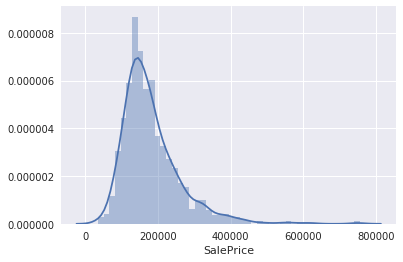

In [5]:
sns.set()
sns.distplot(trainDataDF.SalePrice)
plt.show()

The distribution shows a big peak at the price range between 130000 and 160000, and a notable positive skew. In order to get a measure of the properties of this distribution it is possible to use the corrisponding pandas methods:

In [6]:
print("Skewness: " + str(trainDataDF.SalePrice.skew()))
print("Kurtosis: " + str(trainDataDF.SalePrice.kurt()))

Skewness: 1.9672153474609588
Kurtosis: 7.033906965957225


The skewness is a measure of the asymmetry of the probability distribution with respect to its mean. The skewness value can be positive, negative, or undefined.<br>

Generally, a zero value means that the tails of the distribution balance out. For a unimodal distribution (the SalePrice case), a positive skew denotes that the tail on the right side is fatter or longer (again, the SalePrice case) than the left side (but it does not make a difference between the two shapes).<br>

The kurtosis can be used to get a better measure regarding the shape of the curve. It can be defined as a measure of the "tailedness" of the probability distribution.<br>
An higher kurtosis is the result of infrequent and extreme deviations (or outliers), as opposed to frequent modestly sized deviations.<br>

It is common to compare the kurtosis of a distribution to the normal distribution value: 3. A distribution with kurtosis greater than 3 produces more outliers than the normal distribution.<br>
In our case we used an adjusted version of the kurtosis: by subtracting 3 to the obtained value it is easier to make a comparison to the normal distribution.<br>
The great kurtosis value confirms the right skew we can see on the distribution and the high 'distance' from a normal distribution.<br>

In order to improve our future regression model it would be good to have a more regular distribution for the sale price. Moreover, we know that the model will be evaluated on the logarithm of the sale price, therefore it is a good idea to try to adjust the distribution using the log and analyse the result.

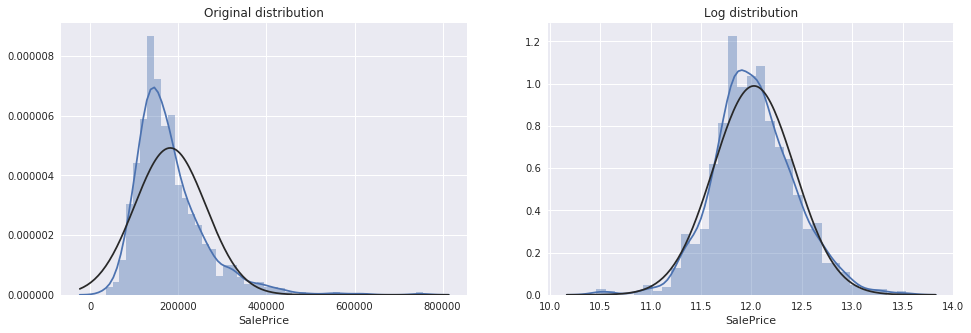

In [7]:
_, ax = plt.subplots(1, 2, figsize=(16, 5))

# plot the original distribution of SalePrice
ax[0].set_title("Original distribution")
sns.distplot(trainDataDF.SalePrice,
             fit=norm, 
             ax = ax[0])

# plot the log-transformed distribution of SalePrice
ax[1].set_title("Log distribution")
sns.distplot(np.log(trainDataDF.SalePrice),
             fit=norm, 
             ax = ax[1])

plt.show()

The plots above show how the log of SalePrice has a better fit on a normal distribution, we can find further confirmation in the following measures:

In [8]:
print("Skewness: " + str(np.log(trainDataDF.SalePrice).skew()))
print("Kurtosis: " + str(np.log(trainDataDF.SalePrice).kurt()))

Skewness: 0.1327137746797166
Kurtosis: 0.8888499967600696


## 1.2 Features Analysis

The next step is conducting a similar investigation to the one above on the features of our dataset. In order to make a lighter and more readable analysis we will avoid calculating the metrics for each feature and we will directly visualize the distributions.

### 1.2.1 Features Splitting

Before starting to plot it is good to have a general idea of what kind of features we have in the dataset. We are going to subdivide our features in three main sets:
 - <b>Categorical</b> or nominal features are qualitative variables that can only be counted, they have no order or intervals (e.g. the name of the neighbourhood or the type of sale).
 - <b>Ordinal</b> features are qualitative variables that have a concept of order so that they can be organized in a sequence or ranked (e.g. the quality and condition of the pool/garage).
 - <b>Numerical</b> features include both interval features, ordinal variables that hold a measure of interval between items but have no absolute zero (e.g. the date of construction), and ratio features, like interval ones, but they can be compared using ratios (e.g. the size of the garage/pool).
 
Let's start dividing features by type:

In [9]:
# remove the Id column
trainDataDF = trainDataDF.drop(columns=['Id'])

# save the SalePrice column and the features in different DataFrames
salePriceDF = pd.DataFrame(trainDataDF.SalePrice)
featuresDF = trainDataDF.drop(columns=['SalePrice'])

# analyze the features types
featuresDF.get_dtype_counts()

float64     3
int64      33
object     43
dtype: int64

As we can see there are three feature's types, we can start by making a rough division between the numerical variables (float and int) and categorical ones (object).<br>

In [10]:
numericalFeaturesDF = featuresDF.select_dtypes(include=[np.dtype('int64'), np.dtype('float64')])
categoricalFeaturesDF = featuresDF.select_dtypes(include=[np.dtype('object')])

Obviously, the data-type of the feature is not enough to tell us about its category so we need to read the description of the features in the documentation and do some manual adjustments.<br>

Of course we can argue about the category choice for different features but this is just a normal part of the features analysis, for example we are assuming that `MSSubClass` (Identifies the type of dwelling involved in the sale) is a categorical feature but it could be argued that it is a numerical one. Fortunately, not all the features are ambiguous, infact the overall quality and condition (`OverallQual`, `OverallCond`) clearly belong to the ordinal features set.

In [11]:
# add OverallQual and OverallCond to the ordinal features
ordinalFeaturesDF = numericalFeaturesDF[['OverallQual',
                                         'OverallCond']]

# add MSSubClass to the categorical features
categoricalFeaturesDF = categoricalFeaturesDF.join(numericalFeaturesDF.MSSubClass)

# remove OverallQual, OverallCond and MSSubClass from the numerical features
numericalFeaturesDF.drop(columns=['OverallQual', 
                                  'OverallCond',
                                  'MSSubClass'], 
                         inplace = True)

In [12]:
# move selected features from categorical to ordinal features
ordinalFeaturesDF = ordinalFeaturesDF.join(categoricalFeaturesDF[['LotShape',
                                                                    'LandSlope',
                                                                    'ExterQual',
                                                                    'ExterCond',
                                                                    'BsmtQual',
                                                                    'BsmtCond',
                                                                    'BsmtExposure',
                                                                    'BsmtFinType1',
                                                                    'BsmtFinType2',
                                                                    'HeatingQC',
                                                                    'KitchenQual',
                                                                    'Functional',
                                                                    'FireplaceQu',
                                                                    'GarageFinish',
                                                                    'GarageQual',
                                                                    'GarageCond',
                                                                    'PavedDrive',
                                                                    'PoolQC',
                                                                    'Fence']])
categoricalFeaturesDF.drop(columns=['LotShape',
                                    'LandSlope',
                                    'ExterQual',
                                    'ExterCond',
                                    'BsmtQual',
                                    'BsmtCond',
                                    'BsmtExposure',
                                    'BsmtFinType1',
                                    'BsmtFinType2',
                                    'HeatingQC',
                                    'KitchenQual',
                                    'Functional',
                                    'FireplaceQu',
                                    'GarageFinish',
                                    'GarageQual',
                                    'GarageCond',
                                    'PavedDrive',
                                    'PoolQC',
                                    'Fence'], 
                          inplace = True)

In [13]:
print("There are {} numerical features".format(len(numericalFeaturesDF.columns) - 1))
print("There are {} categorical features".format(len(categoricalFeaturesDF.columns)))
print("There are {} ordinal features".format(len(ordinalFeaturesDF.columns)))

There are 32 numerical features
There are 25 categorical features
There are 21 ordinal features


Now we can start the analysis of the features divided by type.

### 1.2.2 Categorical Features

In order to visualize the distribution of these variables we will use a count plot and a strip plot, the second one is useful because it allows us to put together different information regarding the overall distribution of a feature as well as the distribution of each of its categories with respect to the sale price.

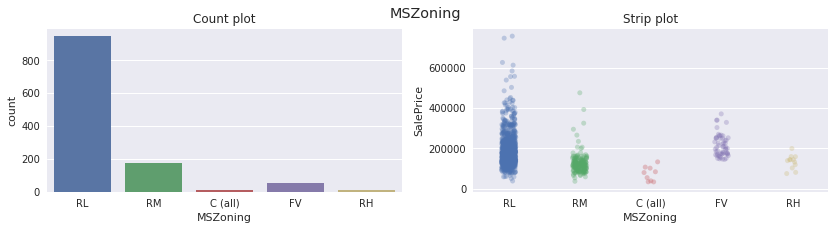

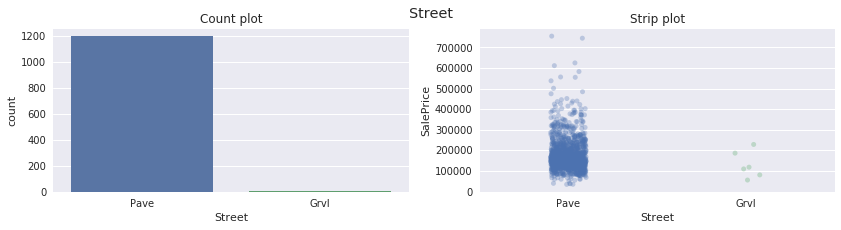

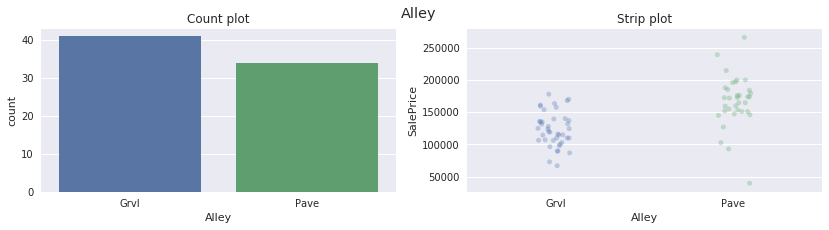

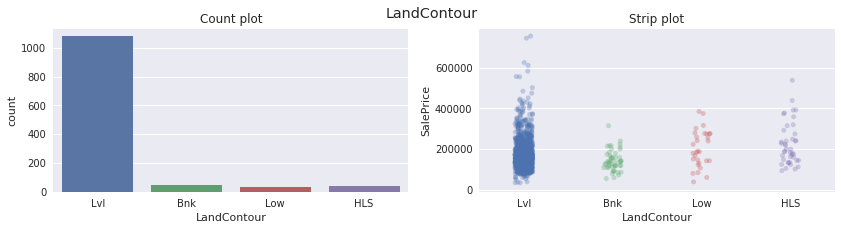

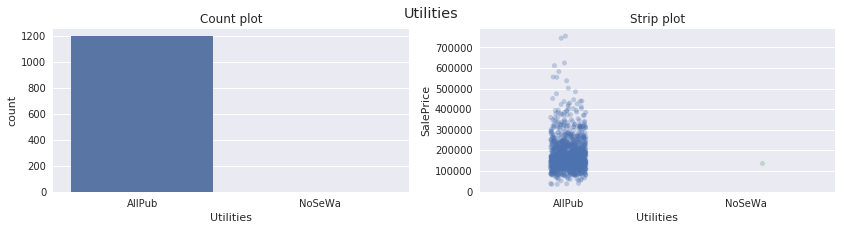

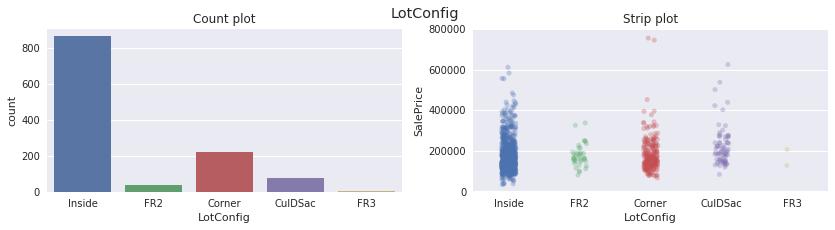

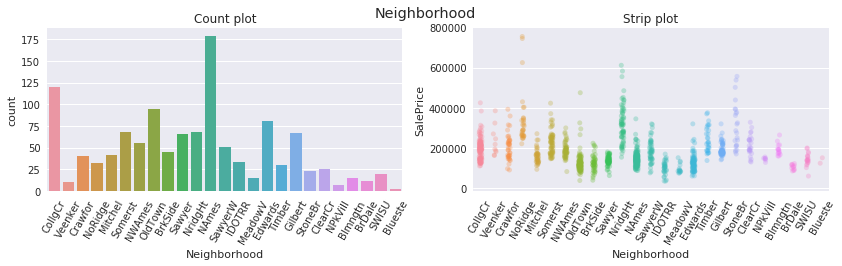

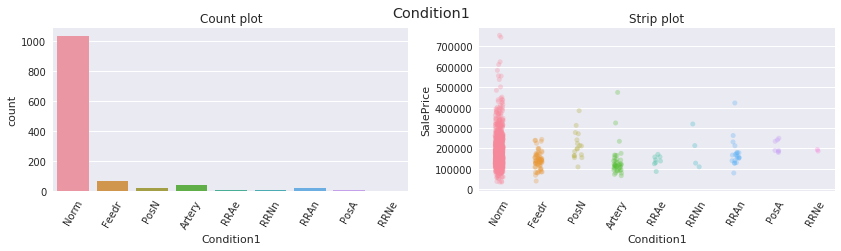

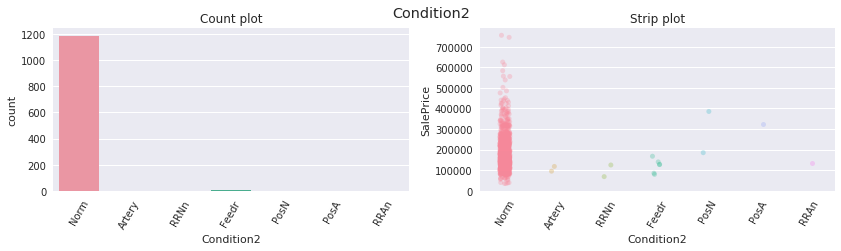

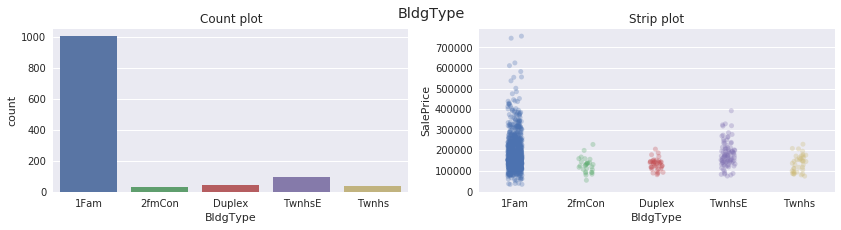

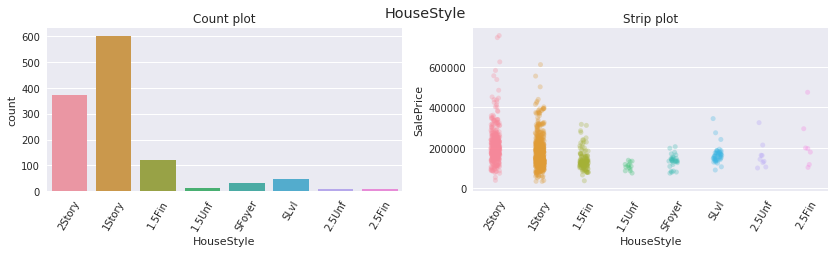

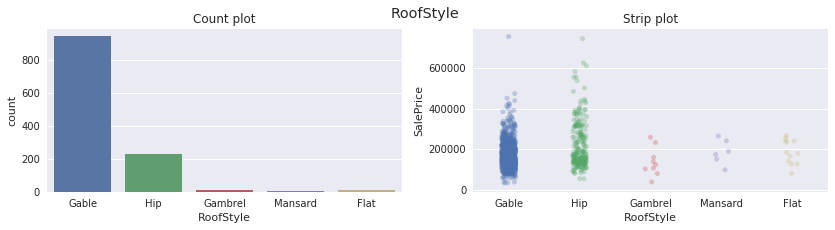

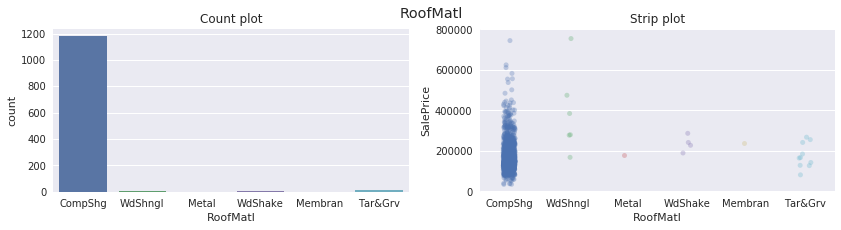

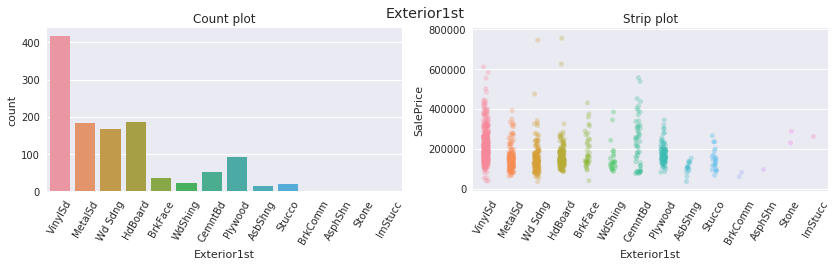

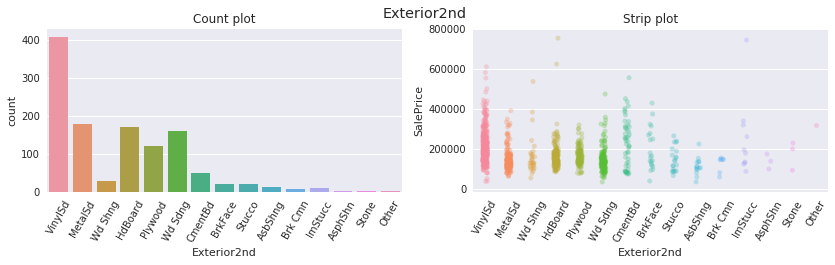

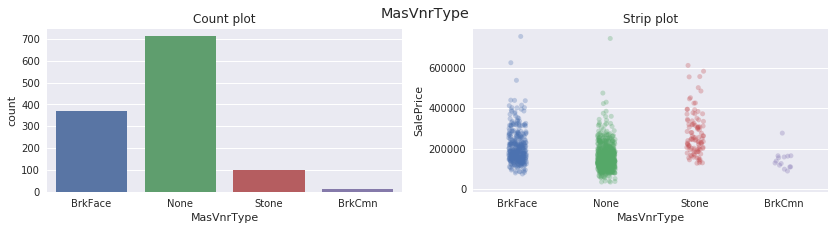

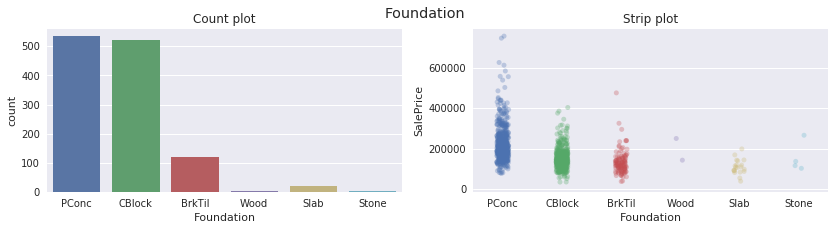

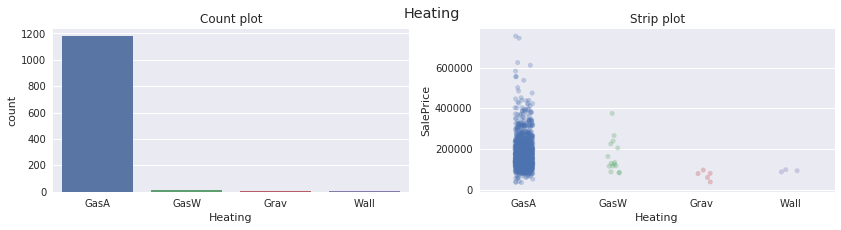

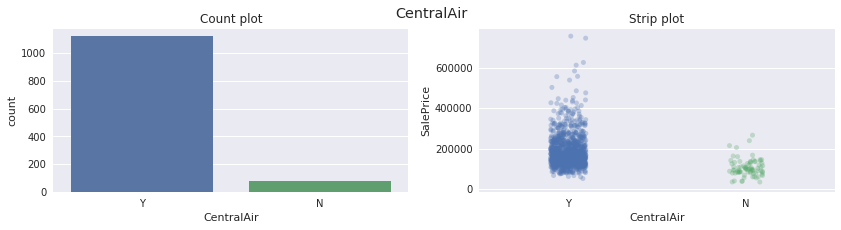

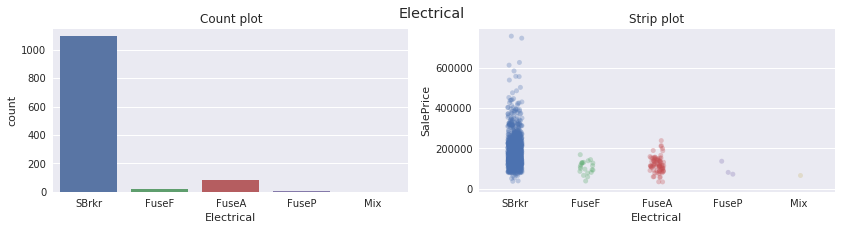

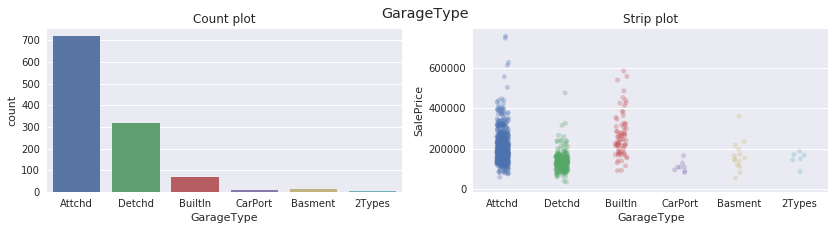

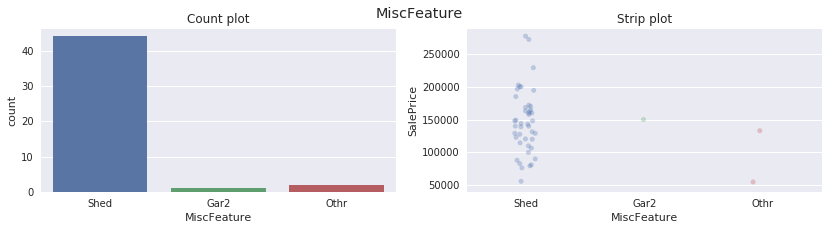

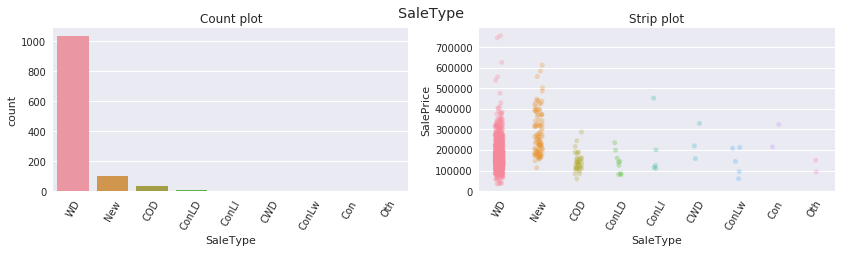

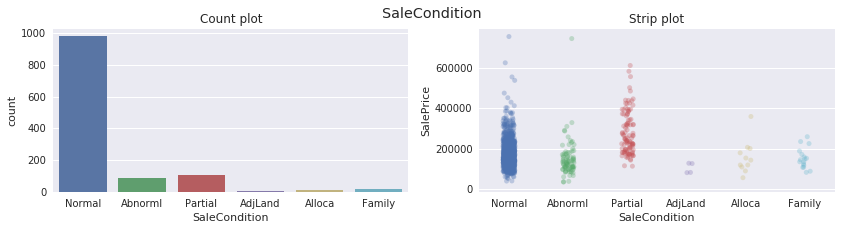

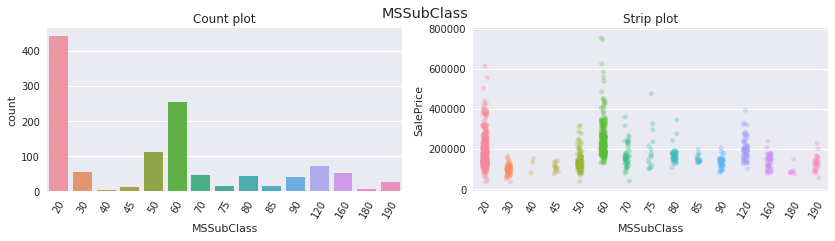

In [14]:
# visualize the distributions of categorical features
for featureName in categoricalFeaturesDF:
    _, ax = plt.subplots(1, 2, figsize=(14, 3))
    
    # plot the count plot
    sns.countplot(categoricalFeaturesDF[featureName], 
                  ax=ax[0])
    ax[0].set_title("Count plot")
    
    # plot the strip plot
    sns.stripplot(x = categoricalFeaturesDF[featureName], 
                  y = salePriceDF.SalePrice, 
                  alpha = 0.3,
                  jitter = True,
                  ax=ax[1])
    ax[1].set_title("Strip plot")
    
    # if there are too many categories, rotate the names in order to avoid overlapping them
    if len(plt.xticks()[1]) > 6:
        ax[0].set_xticklabels(labels=plt.xticks()[1], rotation=60)
        ax[1].set_xticklabels(labels=plt.xticks()[1], rotation=60)
    
    plt.suptitle(featureName)
    plt.show()

An accurate analysis of the plots above can give us multiple insights about the data:
 - Some features are fairly well distributed across their categories and, in some cases, it is possible to notice a correlation between categories and their corresponding price ranges (e.g. `Neighbourhood` and `MSZoning`).
 - A great amount of features, instead, shows a distribution mainly concentrated on a single category (e.g. `Street`, `LandContour`, `Utilities`, `Condition1` and `Condition2`). This could lead to very poor correlation, especially when just a few samples belong to other categories.
 - Looking at the count plots we noticed that some categories miss a great deal of entries because the bars counts don't sum up to 1200 (e.g. `Alley` and `MiscFeature`). This anomaly can be easily explained by the presence of missing entries we did not deal with yet. Moreover, this missing entries will probably be lonked to a single value, therefore showing a similar ditribution to the one described in the previous point.

### 1.2.3 Ordinal Features

In order to analyse the ordinal features we used the same tools (count plot and strip plot) as for the categorical ones.

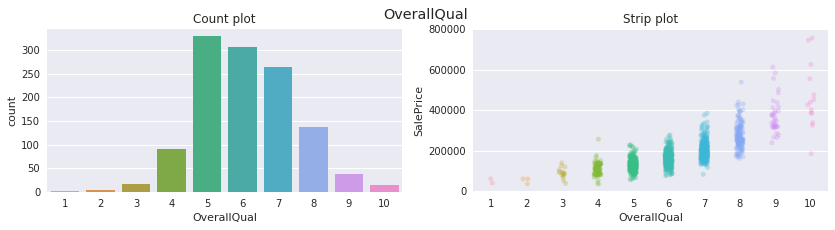

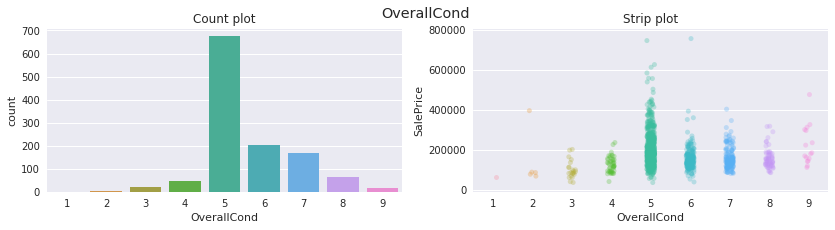

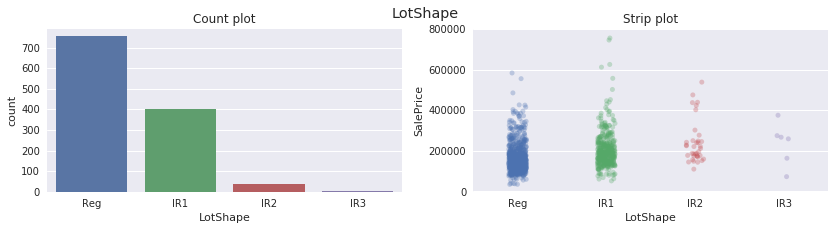

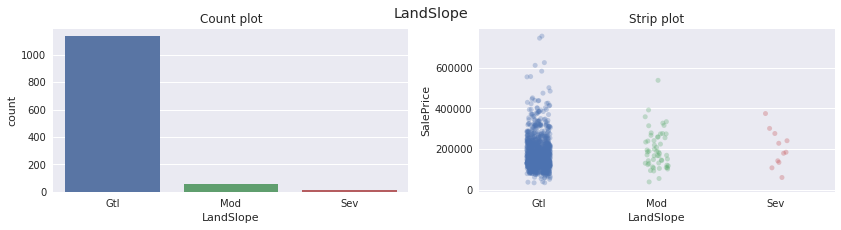

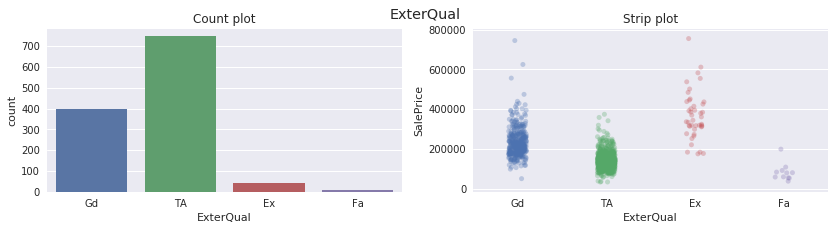

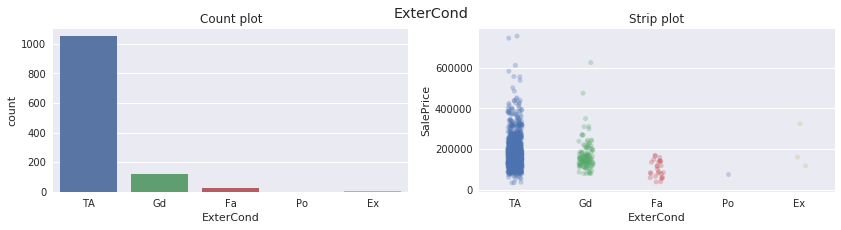

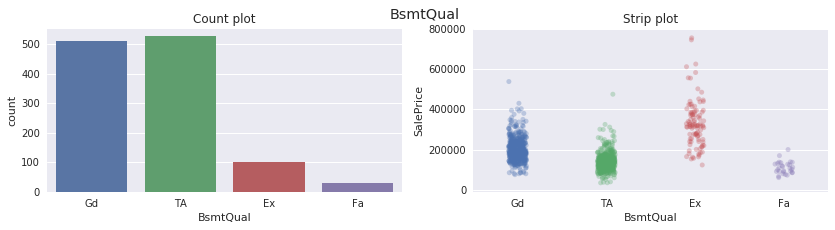

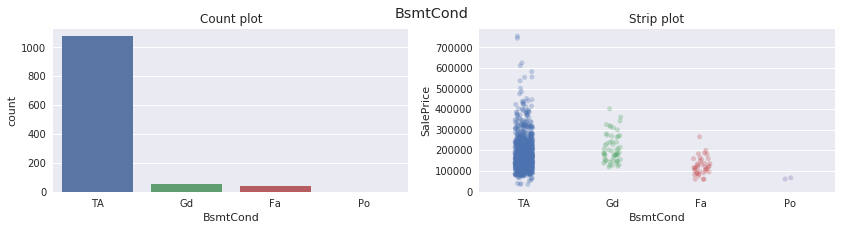

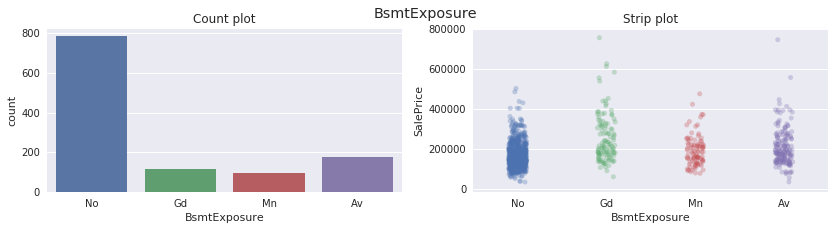

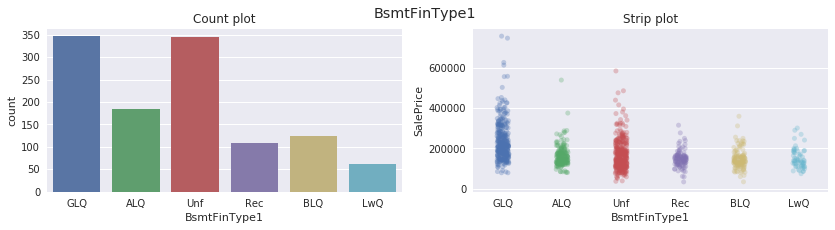

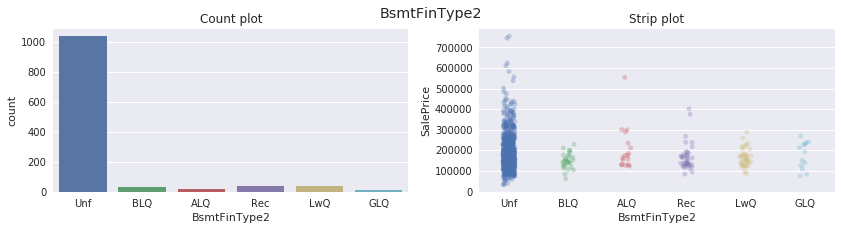

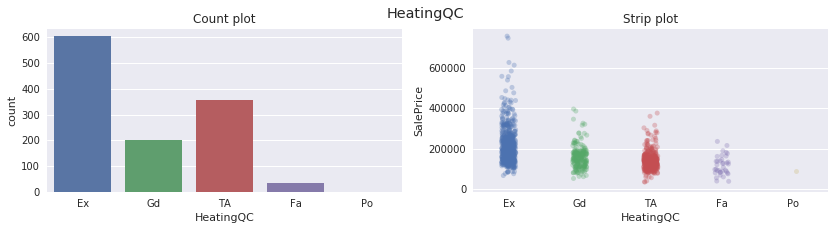

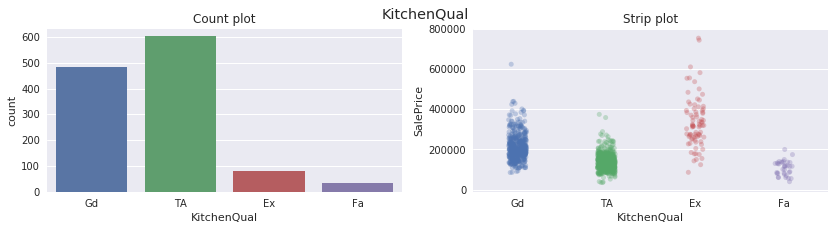

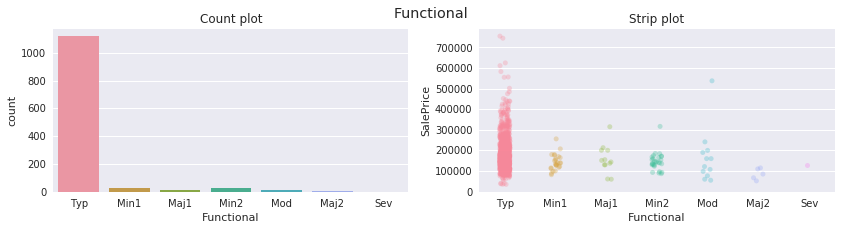

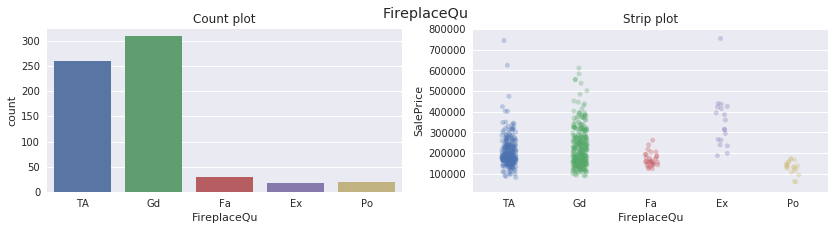

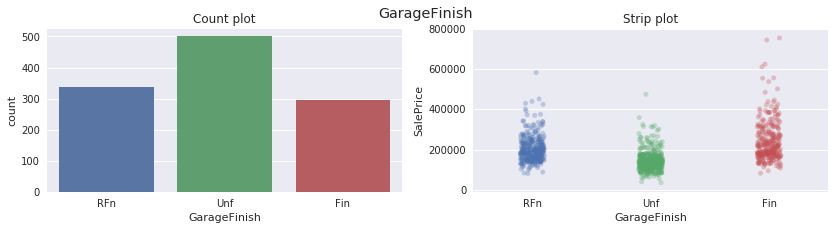

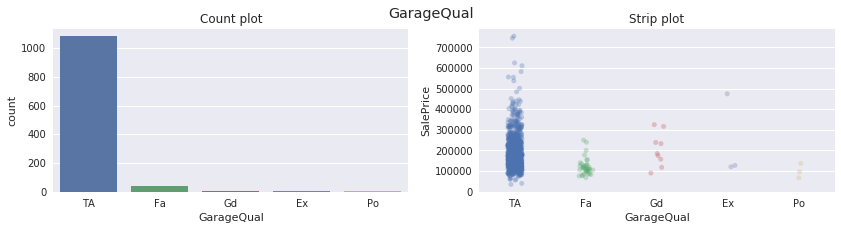

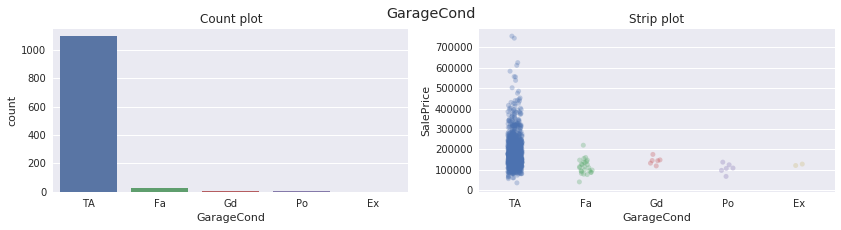

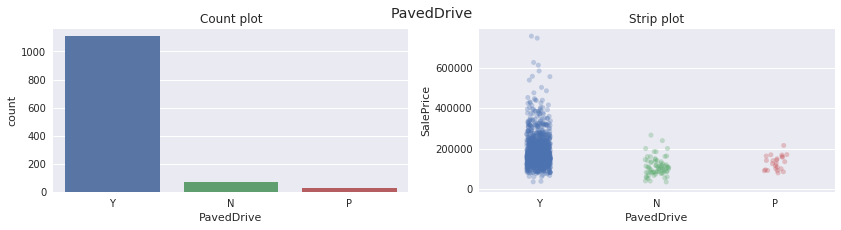

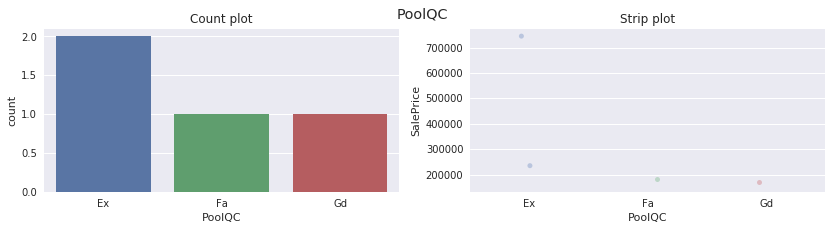

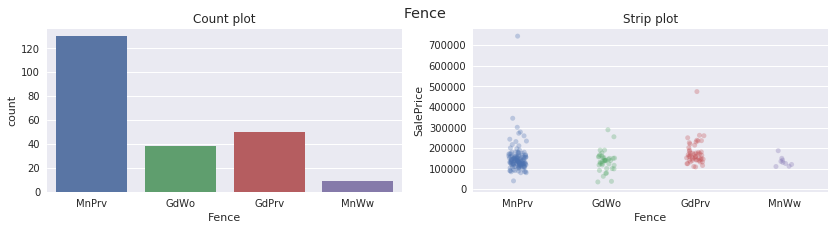

In [15]:
# visualize the distribution of ordinal features
for featureName in ordinalFeaturesDF:
    _, ax = plt.subplots(1, 2, figsize=(14, 3))
    
    # plot the count plot
    sns.countplot(ordinalFeaturesDF[featureName], 
                  ax=ax[0])
    ax[0].set_title("Count plot")
    
    # plot the strip plot
    sns.stripplot(x = ordinalFeaturesDF[featureName], 
                  y = salePriceDF.SalePrice, 
                  alpha = 0.3,
                  jitter = True,
                  ax=ax[1])
    ax[1].set_title("Strip plot")
    
    # in order to get an even better understanding of the distribution we could plot the boxplots over the strips.
    # we finally avoided to show it in order to keep a cleaner visualization since it was mostly a source of 
    # redundant information (it is already possible to get a rough idea of the median and the outliers).
    #sns.boxplot(x = ordinalFeaturesDF[featureName], 
    #              y = salePriceDF.SalePrice, 
    #              ax=ax[1])
    
    plt.suptitle(featureName)
    plt.show()

For the ordinal features we expected to see an even higher correlation between categories and prices because the ordinal features often refer to the quality or the condition of the house (which is normal to assume as highly correlated with the price of the house). In some of the plots (e.g. `OverallQual` and `OverallCond`) this hypothesis finds strong confirmation.<br>

Moreover, the same comments made for the categorical features hold for the ordinals too. We can see multiple features concentrated on a single category (e.g. `LandSlope`, `ExterCond` and `BsmtCond`) and other ones suggest missing values (e.g. `PoolQC` and `Fence`).

### 1.2.4 Numerical Features

In order to study numerical features we will plot the distribution over their values and a scatter plot together with a regression line to analyze the correlation with the sale price.<br>

Unfortunately, it is harder to deal with missing values of numerical features, so it is not possible, for now, to plot the distribution and correlation with price for each feature, we will try anyway and come back to this later.

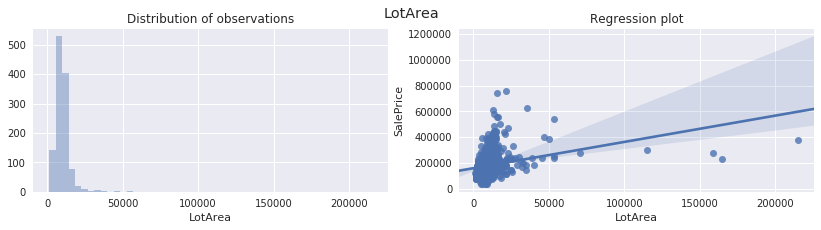

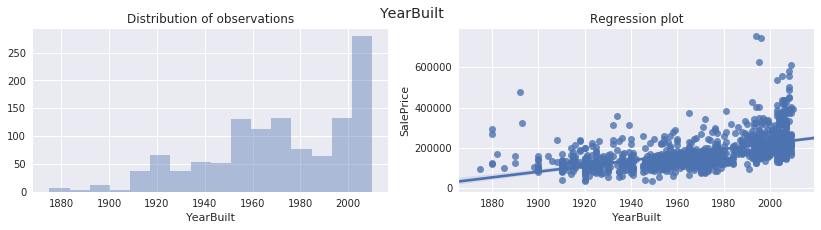

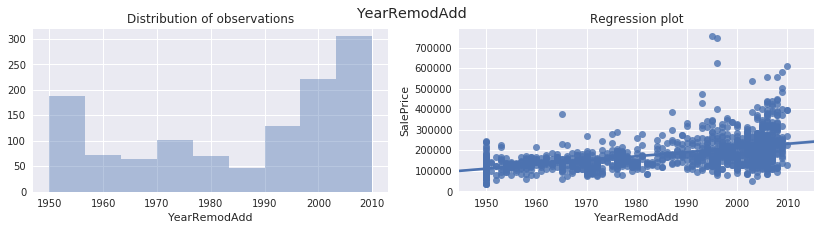

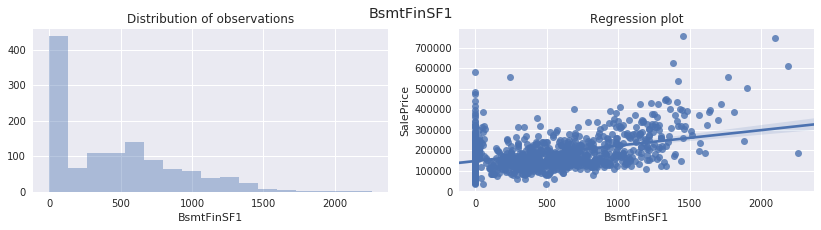

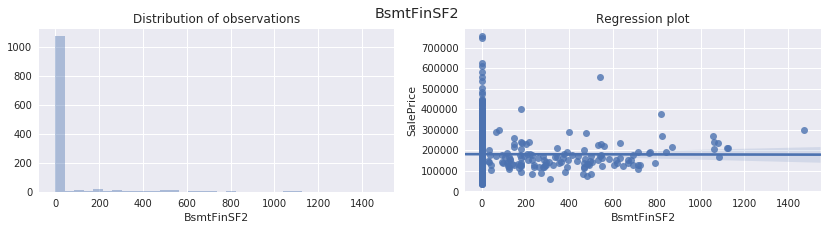

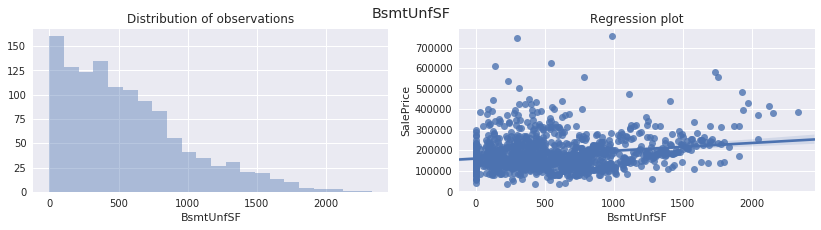

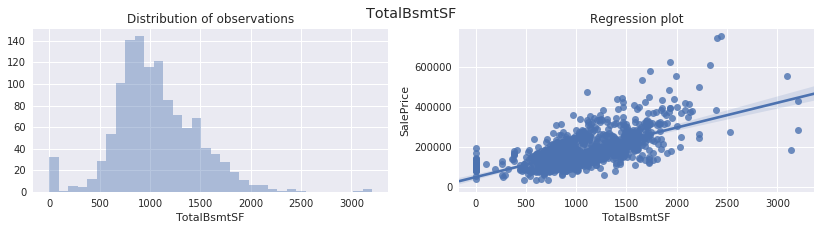

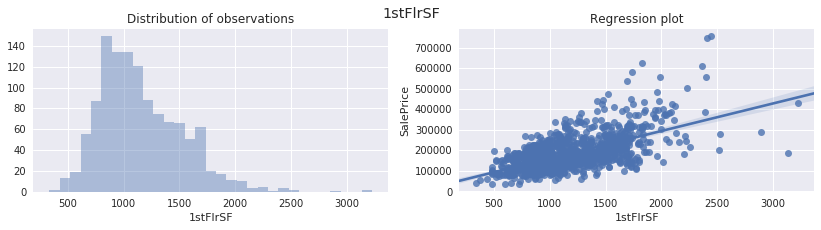

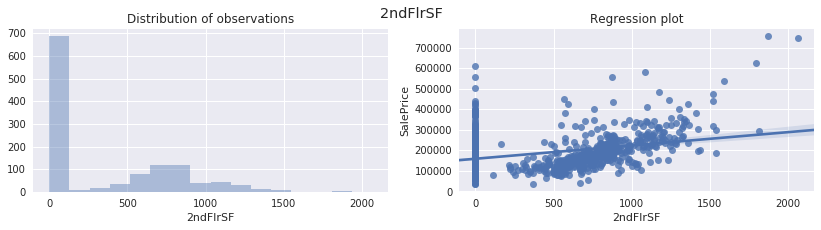

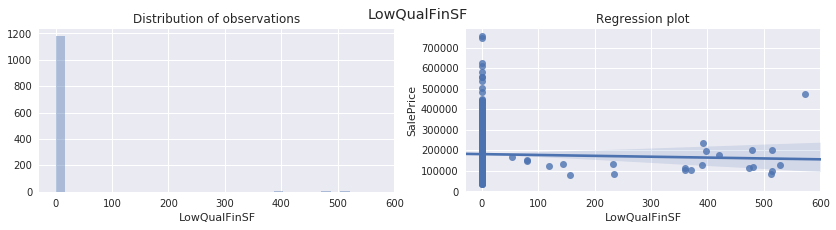

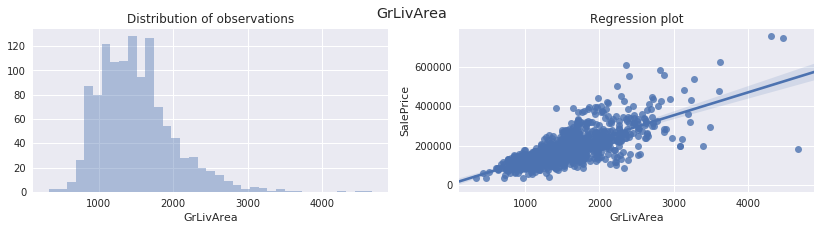

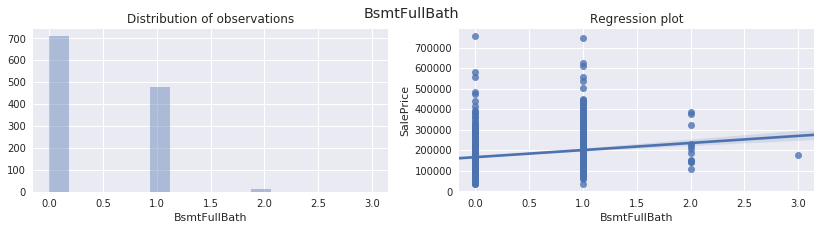

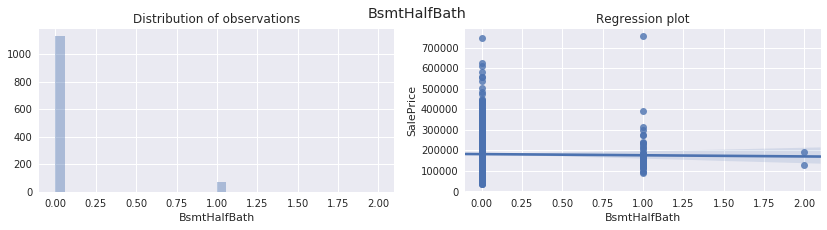

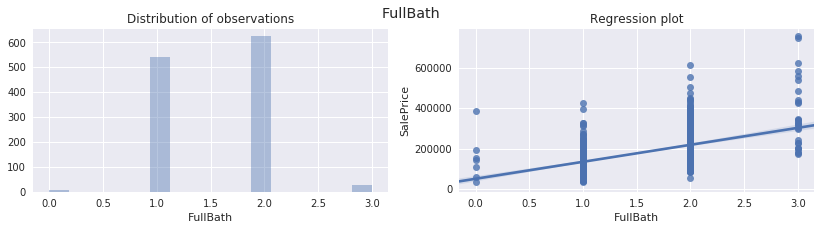

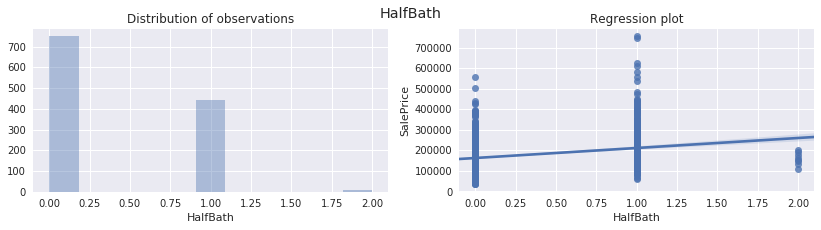

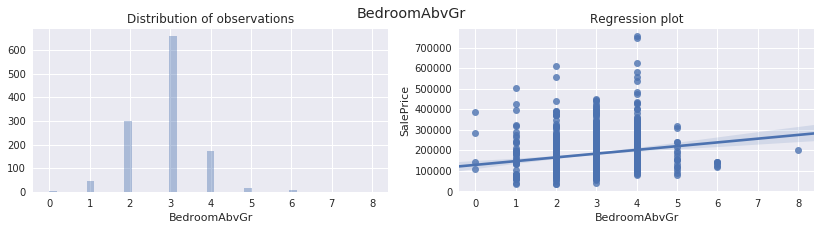

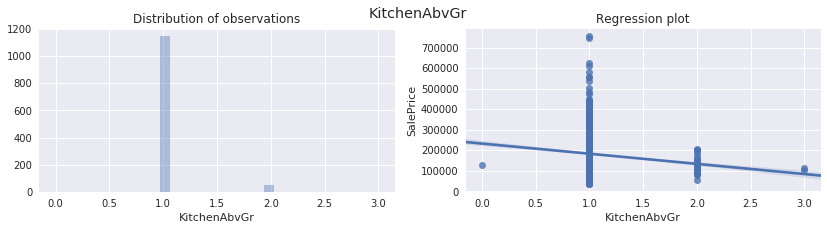

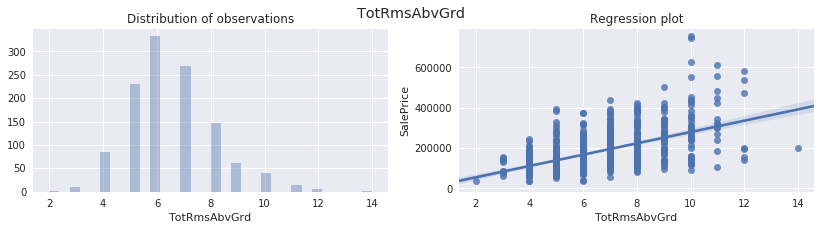

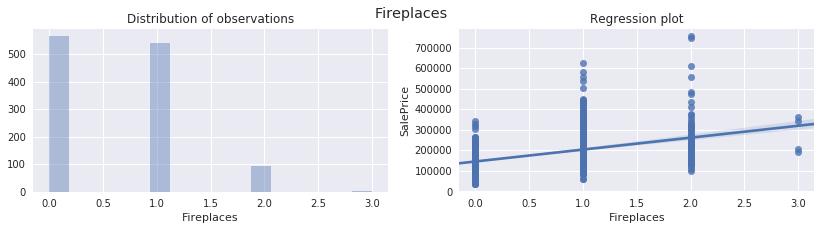

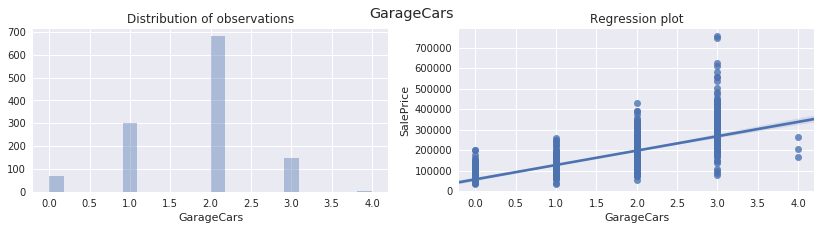

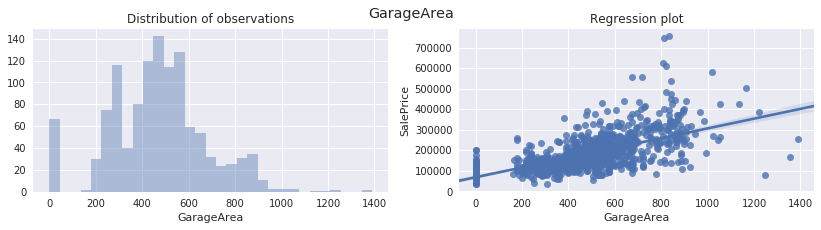

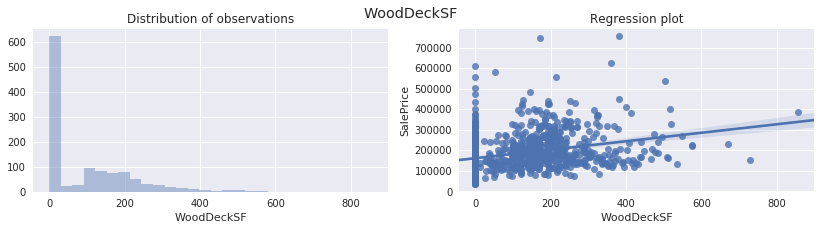

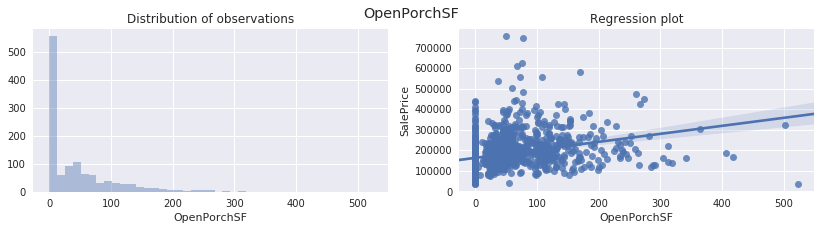

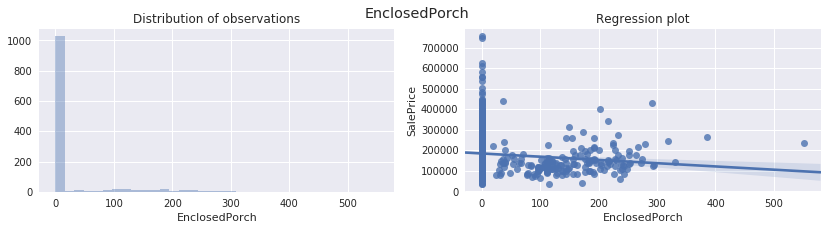

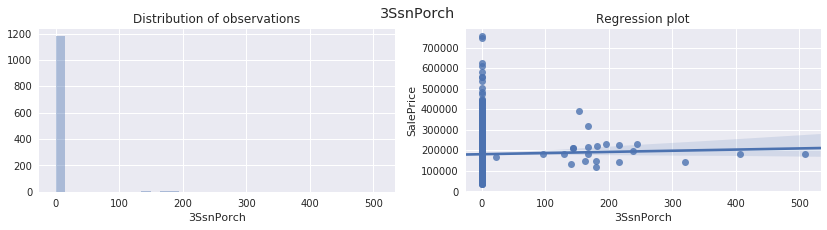

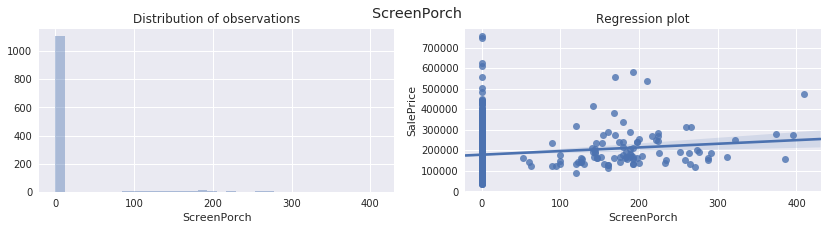

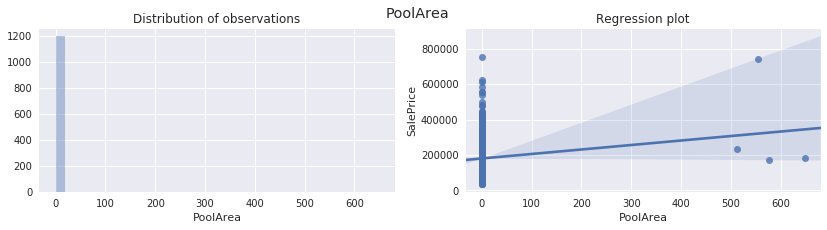

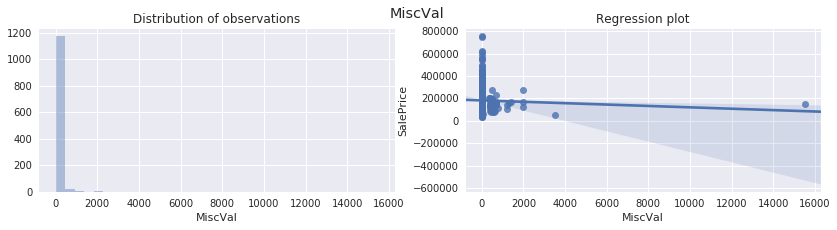

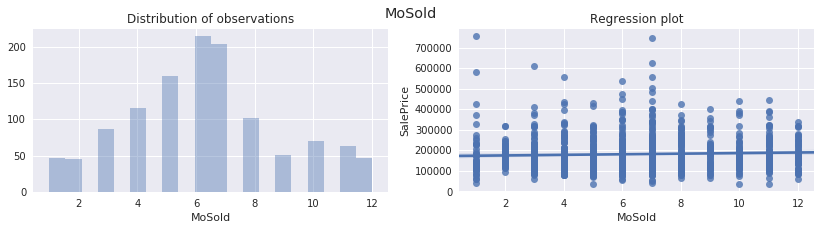

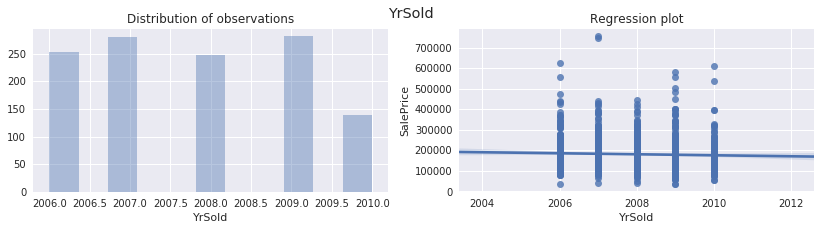

Displayed 30 numerical features over 33
The following features potentially have missing values: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [16]:
# try to visualize the numerical features
count = 0
missing = []
for featureName in numericalFeaturesDF:
    try:
        _, ax = plt.subplots(1, 2, figsize=(14, 3))

        # plot the distribution
        sns.distplot(numericalFeaturesDF[featureName], 
                     kde=False,
                     ax=ax[0])
        ax[0].set_title("Distribution of observations")

        # plot the regression line in a scatter plot
        sns.regplot(x = numericalFeaturesDF[featureName], 
                    y = salePriceDF.SalePrice,
                    ax = ax[1])
        ax[1].set_title("Regression plot")
        
        plt.suptitle(featureName)
        plt.show()
        
        count += 1
    except:
        # if it is not possible to deal with missing values, close the figure
        plt.close()
        # keep track of features with missing values
        missing.append(featureName)

print("Displayed {} numerical features over {}".format(count, len(numericalFeaturesDF.columns)))
print("The following features potentially have missing values: {}".format(missing))

The above plots show both discrete and continuous numerical features, thanks to the regression line we can immediately make the difference between features that have a good correlation with sale price (e.g. `LotArea`, `YearBuilt`, `TotalBsmtSF`  and `TotRmsAbvGrd`) and others that don't (e.g. `MoSold`  and `YrSold`), this information, together with the description of the features, could be useful in order to select useful features: the month of the sale does not really matter when evaluating the price and (unexpectedly) also the year.<br>

As for the previous features, it is possible to see a concentration of observation on a value (0 in this case), some examples are `2ndFlrSF`, `BsmtFinSF1` and `BsmtFinSF2`. For some of these like `PoolArea` or `3SsnPorch` we could also think to create just a boolean variable to tell if the value is zero or not, or to remove the feature due to almost 0 correlation (because amost all the prices correspond to a 0 and just a few have different values).<br>

Moreover, we see that, for some groups of features, it could be useful to make a merge or removal, for example, for the `GarageCars` and `GarageArea`. Other features that could potentially be removed are `MiscVal` and `EnclosedPorch` because the price of the house should grow when we add miscellaneous features or the porch's area increases, but it decreases instead because we only have a few, unbalanced, data and, therefore, we can say that these regressions are biased by the data.

It is worth noticing that both continuous and discrete features contain some outliers so, depending on the robustness of the model that we are using, we may have to remove some of them.<br>
Finally, it is right to mention that the correlations with `SalePrice` can be improved by transforming the features, we will take care of this in the next sections.

In order to visualize the correlation between the features it is necessary to convert the string values in numerical ones. Anyway, before switching to the data pre-processing, it can be useful to give a look at an initial correlation heat map, to get some other insights about the data.

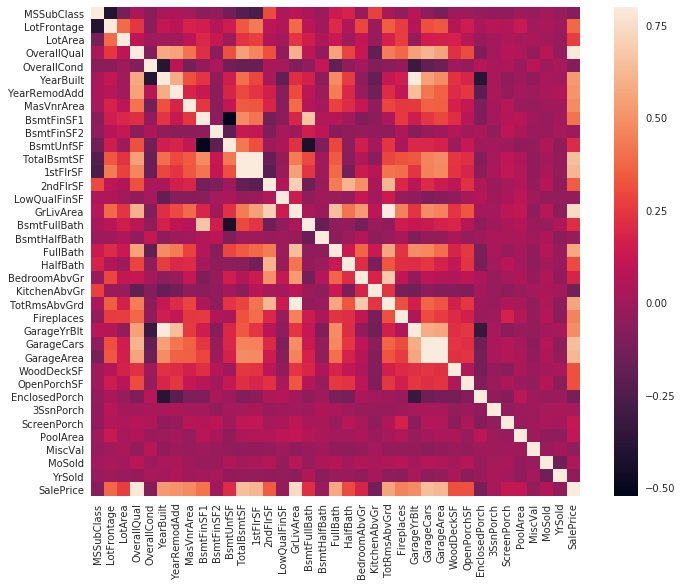

In [17]:
#correlation matrix
corrmat = trainDataDF.corr()
_, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, 
            vmax=.8, 
            square=True, 
            ax = ax)
plt.show()

This heat map already gives us useful information:
 - Features like `OverallQual`, `GrLivArea` and `GarageCars` will be relevant in the regression problem since they show an higher correlation before any preprocessing.
 - It is possible to notice couples and groups of features with very high correlation (e.g. `YearBuilt` and `GarageYrBlt`, `GrLivArea` and `TotRmsAbvGrd`, or the garage features `GarageCars` and `GarageArea`), therefore, as already mentioned before, we will have to perform some feature selection and engineering (merge or remove features).

# 2 Data cleaning and pre-processing

## 2.1 Missing Values

As we already had a lot of issues due to missing values, the first step of pre-processing is going to be their imputation. Let's start by visualizing the missing values and their corresponding category.

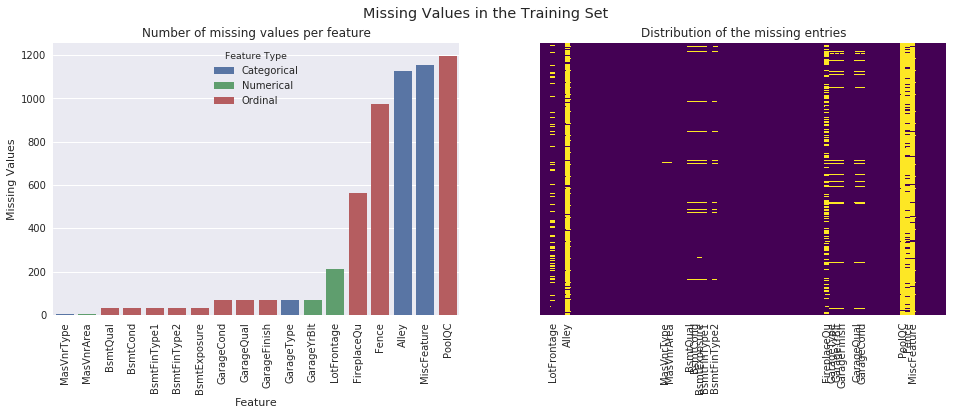

In [18]:
# utility function to get the category given the index
def getCategory(index):
    if index in numericalFeaturesDF.columns.values:
        return 'Numerical'
    if index in categoricalFeaturesDF.columns.values:
        return 'Categorical'
    if index in ordinalFeaturesDF.columns.values:
        return 'Ordinal'  
    return None

# count the missing values and remove columns without missing values
missing = trainDataDF.isnull().sum()
missing = missing[missing > 0]

# sort by number of missing values
missing.sort_values(inplace=True)

# get the feature type from the index and create a the missing values DataFrame
featureType = [getCategory(index) for index in missing.index.values]
missingDF = pd.DataFrame(list(zip(missing.index.values, missing.values, featureType)), 
                         columns=['Feature', 'Missing Values', 'Feature Type'])

_, ax = plt.subplots(1, 2, figsize=(16, 5))

# display the missing values per category
sns.barplot(x='Feature', 
            y='Missing Values', 
            hue='Feature Type', 
            data=missingDF, 
            ax=ax[0], 
            dodge=False)
ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=90)
ax[0].set_title('Number of missing values per feature')

# create a list containing emty spaces or features with missing entries
label_mis = []
for col in trainDataDF.columns.tolist():
    if np.sum(trainDataDF[col].isnull() ) != 0:
        label_mis.append(col)
    else:
        label_mis.append("")

# display the position of the missing entries
sns.heatmap(trainDataDF.isnull(), 
            yticklabels=False, 
            xticklabels=label_mis, 
            cbar = False, 
            cmap='viridis', 
            ax = ax[1])
ax[1].set_title('Distribution of the missing entries')

plt.suptitle('Missing Values in the Training Set')
plt.show()

The bar plot shows an higher amount of missing values in categorical and, particularly, ordinal features. This could be due to a bad encoding of the information instead of real missing data. This hypothesis is supported both by the alignment of multiple bars regarding correlated features on the left, and by the alignment of groups of missing values on the right.<br>

Moreover, the left hand plot shows also features with increadible missing rates, of course this corresponds to what had been already noticed during the previous section on descriptive statistics.<br>
In order to better understand these anomalies, let's analyse these features one by one.

#### Test Data

While we deal with missing values in the train data we will have to apply the same changes to the corresponding missing values in the test data, therefore, we need to analyse this dataset too.

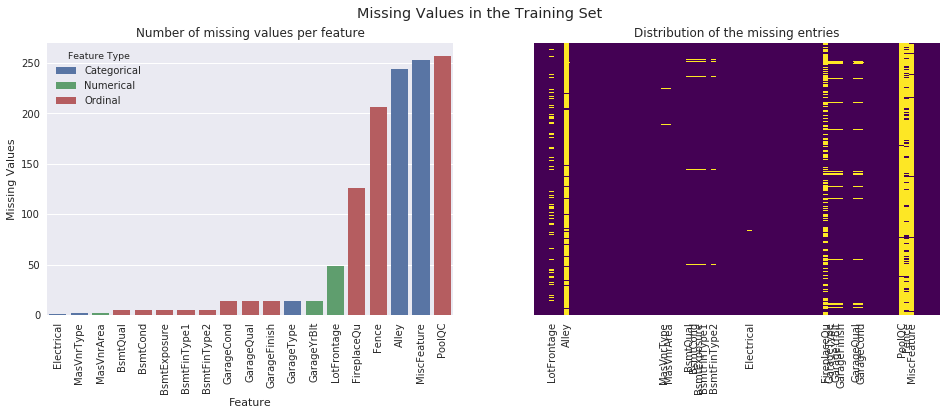

In [19]:
# count the missing values and remove columns without missing values
missingTest = testDataDF.isnull().sum()
missingTest = missingTest[missingTest > 0]

# sort by number of missing values
missingTest.sort_values(inplace=True)

# get the feature type from the index and create a the missing values DataFrame
featureTypeTest = [getCategory(index) for index in missingTest.index.values]
missingTestDF = pd.DataFrame(list(zip(missingTest.index.values, missingTest.values, featureTypeTest)), 
                             columns=['Feature', 'Missing Values', 'Feature Type'])

_, ax = plt.subplots(1, 2, figsize=(16, 5))

# display the missing values per category
sns.barplot(x='Feature', 
            y='Missing Values', 
            hue='Feature Type', 
            data=missingTestDF, 
            ax=ax[0], 
            dodge=False)
ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=90)
ax[0].set_title('Number of missing values per feature')

# create a list containing emty spaces or features with missing entries
label_mis = []
for col in testDataDF.columns.tolist():
    if np.sum(testDataDF[col].isnull() ) != 0:
        label_mis.append(col)
    else:
        label_mis.append("")

# display the position of the missing entries
sns.heatmap(testDataDF.isnull(), 
            yticklabels=False, 
            xticklabels=label_mis, 
            cbar = False, 
            cmap='viridis', 
            ax = ax[1])
ax[1].set_title('Distribution of the missing entries')

plt.suptitle('Missing Values in the Training Set')
plt.show()

The missing values in the test data are very similar to the ones in the training data, the same features are missing and their distributions are the same. This will allow us to conduct a more coherent data cleaning.<br>
The only feature missing in the test data but not in the train data is `Electrical`, we will deal with it separately.

### 2.1.1 Masonry veneer: MasVnrType and MasVnrArea

In [20]:
MasVnrType_Miss = trainDataDF.MasVnrType.isnull()
print("Masonry veneer type has {} missing values".format(MasVnrType_Miss.sum()))

MasVnrArea_Miss = trainDataDF.MasVnrArea.isnull()
print("Masonry veneer area has {} missing values".format(MasVnrArea_Miss.sum()))

MasVnr_CommonMiss = trainDataDF[MasVnrType_Miss & MasVnrArea_Miss]
print("Masonry veneer area and type have {} rows with missing values in common".format(len(MasVnr_CommonMiss)))

display(MasVnr_CommonMiss)

Masonry veneer type has 6 missing values
Masonry veneer area has 6 missing values
Masonry veneer area and type have 6 rows with missing values in common


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234          60       RL          NaN     7851   Pave   NaN      Reg   
529          20       RL          NaN    32668   Pave   NaN      IR1   
650          60       FV         65.0     8125   Pave   NaN      Reg   
936          20       RL         67.0    10083   Pave   NaN      Reg   
973          20       FV         95.0    11639   Pave   NaN      Reg   
977         120       FV         35.0     4274   Pave  Pave      IR1   

    LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
234         Lvl    AllPub    Inside    ...            0    NaN   NaN   
529         Lvl    AllPub   CulDSac    ...            0    NaN   NaN   
650         Lvl    AllPub    Inside    ...            0    NaN   NaN   
936         Lvl    AllPub    Inside    ...            0    NaN   NaN   
973         Lvl    AllPub    Corner    ...            0    NaN   NaN   
977         Lvl    AllPub    Inside    ...            0    NaN   NaN   

    MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
234         NaN       0      5    2010        WD         Normal     216500  
529         NaN       0      3    2007        WD         Alloca     200624  
650         NaN       0      5    2008        WD         Normal     205950  
936         NaN       0      8    2009        WD         Normal     184900  
973         NaN       0     12    2008       New        Partial     182000  
977         NaN       0     11    2007       New        Partial     199900  

[6 rows x 80 columns]

Since the two features have the same number of missing values and the right hand plot above shows aligned data, we decided to check which houses were they referring to and we discovered that they are the same.<br>
At this point we can either eliminate this rows or use some inferred values. Since:
 - The number of rows with missing values is very low: 6/1200
 - MasVnrType already uses the attribute 'None' to code the absence of the masonry veneer
 - MasVnrArea already uses the value 0.0 to code the absence of the masonry veneer

We could decide to remove the entries or, alternatively, to replace the missing values with an imputed one.

```python
# remove the entries
cleanTrainDataDF = trainDataDF.drop(MasVnr_CommonMiss.index)
```

In order to decide how to impute the missing values let's visualize the relation between `MasVnrType`, `SalePrice` and `MasVnrArea`.

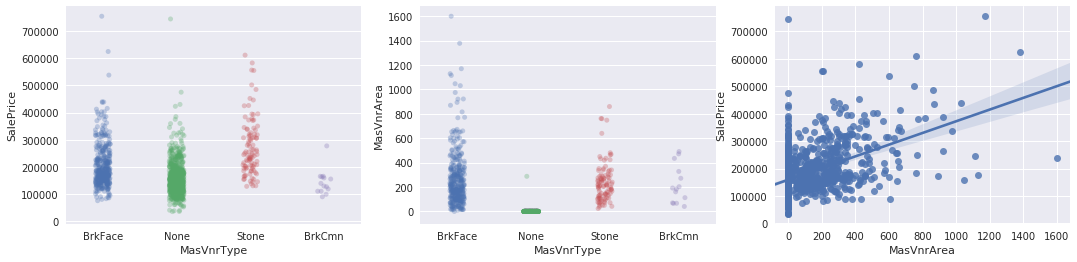

In [21]:
# select the values which are not missing
Masonry_Price_NotNull = trainDataDF[['MasVnrType', 'SalePrice', 'MasVnrArea']][trainDataDF.MasVnrType.notnull()]

_, ax = plt.subplots(1, 3, figsize=(18, 4))

# plot the strip plot for MasVnrType and SalePrice
sns.stripplot(x = Masonry_Price_NotNull.MasVnrType, 
              y = Masonry_Price_NotNull.SalePrice, 
              alpha = 0.3,
              jitter = True,
              ax=ax[0])

# plot the strip plot for MasVnrType and MasVnrArea
sns.stripplot(x = Masonry_Price_NotNull.MasVnrType, 
              y = Masonry_Price_NotNull.MasVnrArea, 
              alpha = 0.3,
              jitter = True,
              ax=ax[1])
    
# plot the regression plot for MasVnrArea and SalePrice
sns.regplot(x = Masonry_Price_NotNull.MasVnrArea, 
              y = Masonry_Price_NotNull.SalePrice, 
              ax=ax[2])

plt.show()

From the table above we can see that the sale price range of the entries with missing values goes from a minimum of 182000 to a maximum of 216500. Unfortunately, these price values are pretty common in our data and tell us nothing. Therefore we will start by replacing the area missing values using regression, in order to be able to do it we use the most correlated feature after having excluded `SalePrice` because otherwise we could not apply the same parameters to the test data.

In [22]:
# correlation of features with MasVnrArea
corrMasVnrArea = dict(trainDataDF.loc[trainDataDF.MasVnrArea.notnull()].corr()['MasVnrArea'])

# remove useless features
del corrMasVnrArea['MasVnrArea']
del corrMasVnrArea['SalePrice']

# find the feature with maximum correlation
corrMasVnrAreaList = list(corrMasVnrArea.items())
corrMasVnrAreaList = sorted(corrMasVnrAreaList, key=lambda x: abs(x[1]), reverse = True)
print("The most correlated feature with MasVnrArea is {}".format(corrMasVnrAreaList[0][0]))

The most correlated feature with MasVnrArea is OverallQual


In [23]:
# compute regression parameters using OverallQual
regDataDF = trainDataDF[['OverallQual', 'MasVnrArea']][trainDataDF.MasVnrType.notnull()]
slopeMasVnrArea, interceptMasVnrArea,_,_,_ = stats.linregress(regDataDF.OverallQual, regDataDF.MasVnrArea)

# replace missing values using regression
cleanTrainDataDF = trainDataDF.copy(deep=True)
cleanTrainDataDF.MasVnrArea.loc[cleanTrainDataDF.MasVnrArea.isnull()] = interceptMasVnrArea + slopeMasVnrArea * cleanTrainDataDF.OverallQual.loc[cleanTrainDataDF.MasVnrArea.isnull()]

# visualize the new values
print("-- Imputed values --")
for i in MasVnr_CommonMiss.index:
    print("index: {}\tMasVnrArea: {}".format(i, cleanTrainDataDF.loc[i, 'MasVnrArea']))

-- Imputed values --
index: 234	MasVnrArea: 98.43381070519558
index: 529	MasVnrArea: 98.43381070519558
index: 650	MasVnrArea: 152.54061413139624
index: 936	MasVnrArea: 152.54061413139624
index: 973	MasVnrArea: 152.54061413139624
index: 977	MasVnrArea: 152.54061413139624


Since the `MasVnrType` is a categorical feature we will replace its missing values with a different approach. Let's look again at its distribution over the categories.

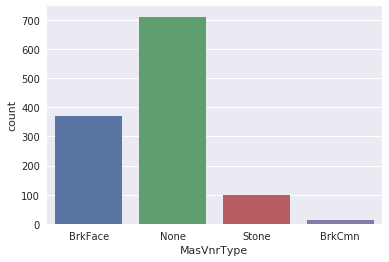

In [24]:
sns.countplot(Masonry_Price_NotNull.MasVnrType)
plt.show()

If we were to try a standard approach, for example, replace the missing values with the most frequent, then we would assign the 'None' category. This choice would be incoherent with the logical meaning of the data because the corresponding areas (just imputed) are greater than zero.<br>
Moreover, if we look again at the plots showing the relation between `MasVnrType`, `MasVnrArea` and `SalePrice`, and, considering that 'BrkFace' is also the most frequent category after having excluded 'None', we can conclude that the most probable category for these entries is 'BrkFace'.

In [25]:
# replace the type NaN
cleanTrainDataDF.fillna(value={'MasVnrType': 'BrkFace'}, 
                        inplace=True)

Furthermore, if we give a closer look to the central plot above (plotted again below), it clearly shows some irregularities: if `MasVnrType` is None, then `MasVnrArea` should be 0, and viceversa.

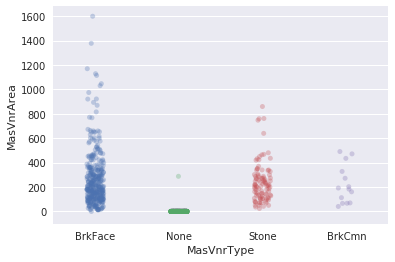

    MasVnrType  MasVnrArea  SalePrice
624       None       288.0     165150
773       None         1.0     114500
[688]


In [26]:
# plot the strip plot for MasVnrType and MasVnrArea
sns.stripplot(x = cleanTrainDataDF.MasVnrType, 
              y = cleanTrainDataDF.MasVnrArea, 
              alpha = 0.3,
              jitter = True)
plt.show()

# look for rows containing anomalies
errorsMasVnrAreaDF = cleanTrainDataDF.loc[(cleanTrainDataDF.MasVnrType == 'None').values & 
                                          (cleanTrainDataDF.MasVnrArea > 0).values]
errorsMasVnrTypeDF = cleanTrainDataDF.loc[(cleanTrainDataDF.MasVnrType != 'None').values & 
                                          (cleanTrainDataDF.MasVnrArea == 0).values]

# show the results
print(errorsMasVnrAreaDF[['MasVnrType', 'MasVnrArea', 'SalePrice']])
print(errorsMasVnrTypeDF[['MasVnrType', 'MasVnrArea', 'SalePrice']].index.values)

Of course this values are just wrong, fortunately, it is easy to fix them: foor the first one, since the area is too big, we will assume it belongs to another type (again, by looking at the distributions above we can assume it belongs to 'BrkFace'), for the second one, instead, we will just set the area to 0 because it is very small, while, for the last one we will change the type to 'None' because the area is 0.

In [27]:
cleanTrainDataDF.loc[624, 'MasVnrType'] = 'BrkFace'
cleanTrainDataDF.loc[773, 'MasVnrArea'] = 0 
cleanTrainDataDF.loc[688, 'MasVnrType'] = 'None' 

#### Test Data

As for the training data, we will first check if the features are missing from the same entries (we already have got an hint from the plot representing the distribution of the missing values).

In [28]:
MasVnrType_Miss = testDataDF.MasVnrType.isnull()
print("Masonry veneer type has {} missing values".format(MasVnrType_Miss.sum()))

MasVnrArea_Miss = testDataDF.MasVnrArea.isnull()
print("Masonry veneer area has {} missing values".format(MasVnrArea_Miss.sum()))

MasVnr_CommonMiss = testDataDF[MasVnrType_Miss & MasVnrArea_Miss]
print("Masonry veneer area and type have {} rows with missing values in common".format(len(MasVnr_CommonMiss)))

display(MasVnr_CommonMiss)

Masonry veneer type has 2 missing values
Masonry veneer area has 2 missing values
Masonry veneer area and type have 2 rows with missing values in common


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
43  1244          20       RL        107.0    13891   Pave   NaN      Reg   
78  1279          60       RL         75.0     9473   Pave   NaN      Reg   

   LandContour Utilities      ...       ScreenPorch PoolArea PoolQC Fence  \
43         Lvl    AllPub      ...                 0        0    NaN   NaN   
78         Lvl    AllPub      ...                 0        0    NaN   NaN   

   MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
43         NaN       0      9    2006       New        Partial  
78         NaN       0      3    2008        WD         Normal  

[2 rows x 80 columns]

Let's replace the missing values using the same approach used before.

In [29]:
# replace missing values using regression
cleanTestDataDF = testDataDF.copy(deep=True)
cleanTestDataDF.MasVnrArea.loc[cleanTestDataDF.MasVnrArea.isnull()] = interceptMasVnrArea + slopeMasVnrArea * cleanTestDataDF.OverallQual.loc[cleanTestDataDF.MasVnrArea.isnull()]

# visualize the new values
print("-- Imputed values --")
for i in MasVnr_CommonMiss.index:
    print("index: {}\tMasVnrArea: {}".format(i, cleanTrainDataDF.loc[i, 'MasVnrArea']))

-- Imputed values --
index: 43	MasVnrArea: 0.0
index: 78	MasVnrArea: 0.0


Since the `MasVnrArea` is 0, the `MasVnrType` will be 'None'.

In [30]:
# replace NaN with None
cleanTestDataDF.fillna(value={'MasVnrType': 'None'}, 
                       inplace=True)

### 2.1.2 Basement: BsmtQual, BsmtCond, BsmtFinType1, BsmtFinType2 and BsmtExposure

The basement has a very similar situation to the masonry veneer: more than one attribute contains missing values and they seem to be aligned.

In [31]:
BsmtQual_Miss = cleanTrainDataDF.BsmtQual.isnull()
print("Basement height [BsmtQual] has {} missing values".format(BsmtQual_Miss.sum()))

BsmtCond_Miss = cleanTrainDataDF.BsmtCond.isnull()
print("Basement condition [BsmtCond] has {} missing values".format(BsmtCond_Miss.sum()))

BsmtFinType1_Miss = cleanTrainDataDF.BsmtFinType1.isnull()
print("Basement rating 1 [BsmtFinType1] has {} missing values".format(BsmtFinType1_Miss.sum()))

BsmtFinType2_Miss = cleanTrainDataDF.BsmtFinType2.isnull()
print("Basement rating 2 [BsmtFinType2] has {} missing values".format(BsmtFinType2_Miss.sum()))

BsmtExposure_Miss = cleanTrainDataDF.BsmtExposure.isnull()
print("Basement exposure [BsmtExposure] has {} missing values".format(BsmtExposure_Miss.sum()))

Basement_CommonMiss = cleanTrainDataDF[BsmtQual_Miss & 
                                       BsmtCond_Miss & 
                                       BsmtFinType1_Miss & 
                                       BsmtFinType2_Miss & 
                                       BsmtExposure_Miss]
print("Basement's features have {} rows with missing values in common".format(len(Basement_CommonMiss)))

Basement height [BsmtQual] has 32 missing values
Basement condition [BsmtCond] has 32 missing values
Basement rating 1 [BsmtFinType1] has 32 missing values
Basement rating 2 [BsmtFinType2] has 33 missing values
Basement exposure [BsmtExposure] has 33 missing values
Basement's features have 32 rows with missing values in common


Again, we have most of the missing rows in common. By looking at the features we can see that we are missing 4 basement features (`BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`) that do not contain any missing value.
Let's analyze what values do these features present in the rows where the others have missing values.

In [32]:
display(Basement_CommonMiss[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']])

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
17             0           0          0            0
39             0           0          0            0
90             0           0          0            0
102            0           0          0            0
156            0           0          0            0
182            0           0          0            0
259            0           0          0            0
342            0           0          0            0
362            0           0          0            0
371            0           0          0            0
392            0           0          0            0
520            0           0          0            0
532            0           0          0            0
533            0           0          0            0
553            0           0          0            0
646            0           0          0            0
705            0           0          0            0
736            0           0          0            0
749            0           0          0            0
778            0           0          0            0
868            0           0          0            0
894            0           0          0            0
897            0           0          0            0
984            0           0          0            0
1000           0           0          0            0
1011           0           0          0            0
1035           0           0          0            0
1045           0           0          0            0
1048           0           0          0            0
1049           0           0          0            0
1090           0           0          0            0
1179           0           0          0            0

This values are strange because if the information about the basement is missing it should be absent in all the basement's features. By looking at the data description we can see that:<br>

`BsmtQual`: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       ...
       NA	No Basement
       
`BsmtCond`: Evaluates the general condition of the basement

       Ex	Excellent
       ...
       NA	No Basement
	
`BsmtExposure`: Refers to walkout or garden level walls

       Gd	Good Exposure
       ...
       NA	No Basement

`BsmtFinType1`: Rating of basement finished area

       GLQ	Good Living Quarters
       ...
       NA	No Basement

`BsmtFinType2`: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ...
       NA	No Basement
       
Therefore the NaN value we found is not a missing value but corresponds to the absence of basement. This information only needs to be encoded properly, for example, by replacing all the NaN with the string 'NA' (to be coherent with the given documentation).

In [33]:
# replace NaN with 'NA'
cleanTrainDataDF.fillna(value={'BsmtQual': 'NA', 
                               'BsmtCond': 'NA', 
                               'BsmtFinType1': 'NA', 
                               'BsmtFinType2': 'NA', 
                               'BsmtExposure': 'NA'}, 
                        inplace=True)

#### Test Data

In [34]:
# replace NaN with 'NA'
cleanTestDataDF.fillna(value={'BsmtQual': 'NA', 
                               'BsmtCond': 'NA', 
                               'BsmtFinType1': 'NA', 
                               'BsmtFinType2': 'NA', 
                               'BsmtExposure': 'NA'}, 
                        inplace=True)

### 2.1.3 Garage: GarageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond

The garage's features have an analogous situation to the previous one. Let's do the usual checks.

In [35]:
GarageType_Miss = cleanTrainDataDF.GarageType.isnull()
print("Garage location [GarageType] has {} missing values".format(GarageType_Miss.sum()))

GarageYrBlt_Miss = cleanTrainDataDF.GarageYrBlt.isnull()
print("Year garage was built [GarageYrBlt] has {} missing values".format(GarageYrBlt_Miss.sum()))

GarageFinish_Miss = cleanTrainDataDF.GarageFinish.isnull()
print("Interior finish of the garage [GarageFinish] has {} missing values".format(GarageFinish_Miss.sum()))

GarageQual_Miss = cleanTrainDataDF.GarageQual.isnull()
print("Garage Quality [GarageQual] has {} missing values".format(GarageQual_Miss.sum()))

GarageCond_Miss = cleanTrainDataDF.GarageCond.isnull()
print("Garage condition [GarageCond] has {} missing values".format(GarageCond_Miss.sum()))

Garage_CommonMiss = cleanTrainDataDF[GarageType_Miss & 
                                     GarageYrBlt_Miss & 
                                     GarageFinish_Miss & 
                                     GarageQual_Miss & 
                                     GarageCond_Miss]
print("Garage's features have {} rows with missing values in common".format(len(Garage_CommonMiss)))

Garage location [GarageType] has 67 missing values
Year garage was built [GarageYrBlt] has 67 missing values
Interior finish of the garage [GarageFinish] has 67 missing values
Garage Quality [GarageQual] has 67 missing values
Garage condition [GarageCond] has 67 missing values
Garage's features have 67 rows with missing values in common


This situation is very similar to the previous because, also in this case, we have other garage attributes with normal values and the data description shows that NaN values are not missing values:<br>

`GarageType`: Garage location
		
       2Types	More than one type of garage
       ...
       NA	No Garage
		
`GarageYrBlt`: Year garage was built
		
`GarageFinish`: Interior finish of the garage

       Fin	Finished
       ...
       NA	No Garage

`GarageQual`: Garage quality

       Ex	Excellent
       ...
       NA	No Garage
		
`GarageCond`: Garage condition

       Ex	Excellent
       ...
       NA	No Garage

Unfortunately, the year the garage was built is a different matter: if the house does not have a garage, we can replace 'NA' in the other features but we need a meaningful value for the year.<br>

In [36]:
# replace NaN with 'NA'
cleanTrainDataDF.fillna(value={'GarageType': 'NA', 
                               'GarageFinish': 'NA', 
                               'GarageQual': 'NA', 
                               'GarageCond': 'NA'}, 
                        inplace=True)

By looking at the previous heat map we noticed that `GarageYrBlt` has high correlation with the other garage variables and has a notable correlation with `YearBuilt` too because, usually, the garage is built together with the house.<br>
After these considerations we can decide to remove this feature from the dataset since it is mostly redundant information and would probably be removed later during the feature selection.

In [37]:
cleanTrainDataDF.drop(columns=['GarageYrBlt'], inplace=True)

#### Test Data

In [38]:
# replace NaN with 'NA'
cleanTestDataDF.fillna(value={'GarageType': 'NA', 
                               'GarageFinish': 'NA', 
                               'GarageQual': 'NA', 
                               'GarageCond': 'NA'}, 
                        inplace=True)

# drop GarageYrBlt
cleanTestDataDF.drop(columns=['GarageYrBlt'], inplace=True)

### 2.1.4 Lot Frontage

In [39]:
LotFrontage_Miss = cleanTrainDataDF.LotFrontage.isnull()
print("LotFrontage has {} missing values".format(LotFrontage_Miss.sum()))

LotFrontage has 210 missing values


The `LotFrontage` feature has a very high number of missing values. We know that it is a numerical feature that expresses the linear feet of street connected to property. Let's analyse the distribution to get a better understanding of its values.

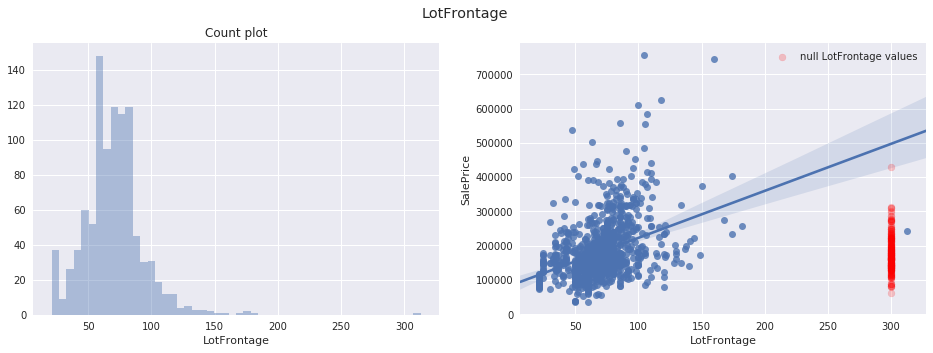

In [40]:
# get the prices of datapoints with and without missing values
LotFrontage_Price_NotNull = cleanTrainDataDF[['LotFrontage', 'SalePrice']][cleanTrainDataDF.LotFrontage.notnull()]
LotFrontage_Price_Null = cleanTrainDataDF['SalePrice'][cleanTrainDataDF.LotFrontage.isnull()]
_, ax = plt.subplots(1, 2, figsize=(16, 5))

# plot the distribution of the LotFrontage values
sns.distplot(LotFrontage_Price_NotNull.LotFrontage, 
             kde=False,
             ax=ax[0])
ax[0].set_title("Count plot")

# plot the points without missing values
sns.regplot(x = LotFrontage_Price_NotNull.LotFrontage, 
            y = LotFrontage_Price_NotNull.SalePrice,
            ax = ax[1])

# plot the points with missing LotFrontage in a convenient point of the plot: 300
ax[1].scatter(np.ones(len(LotFrontage_Price_Null))*300,
              LotFrontage_Price_Null, 
              c = 'r', 
              alpha = 0.2,
              label = 'null LotFrontage values')
ax[1].legend()

plt.suptitle('LotFrontage')
plt.show()

By looking at the distribution we see that the price range of our missing values is aligned with the other data and has high variance over `SalePrice`. More importantly, there is no data relative to houses directly connected to the street, namely with 0 feet of street connected to the property.

In [41]:
# Check the presence of points with 0 LotFrontage
LotFrontage_Price_NotNull[LotFrontage_Price_NotNull.LotFrontage == np.min(LotFrontage_Price_NotNull.LotFrontage)]

LotFrontage  SalePrice
75           21.0      91000
225          21.0     112000
227          21.0     106000
232          21.0      94500
235          21.0      89500
363          21.0     118000
430          21.0      85400
434          21.0      81000
489          21.0      86000
500          21.0     113000
614          21.0      75500
649          21.0      84500
655          21.0      88000
837          21.0     100000
915          21.0      75000
1007         21.0      88000
1029         21.0     118000
1038         21.0      97000
1039         21.0      80000

The lowest number of feet is 21, we can assume that the missing values correspond to houses that are directly connected to the street and replace the value with a 0.

In [42]:
# replace NaN with 0
cleanTrainDataDF.fillna(value={'LotFrontage': 0}, inplace=True)

#### Test Data

In [43]:
# replace NaN with 0
cleanTestDataDF.fillna(value={'LotFrontage': 0}, inplace=True)

### 2.1.5 FireplaceQu, Fence, Alley, MiscFeature, PoolQC

Finally, we grouped the last features because they all have a huge number of missing values (reaching almost the totality of data). Of course, this is not due to the absence of information but to its bad encoding, as can be seen one more time from the data description:

`FireplaceQu`: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       ...
       NA	No Fireplace

`Fence`: Fence quality
		
       GdPrv	Good Privacy
       ...
       NA	No Fence

`Alley`: Type of alley access to property

       Grvl	Gravel
       ...
       NA 	No alley access
       
`MiscFeature`: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       ...
       NA	None

`PoolQC`: Pool quality
		
       Ex	Excellent
       ...
       NA	No Pool
       
Again, since the value NA never appears in the data we can assume the correspondence and replace NaN with the string 'NA'.

In [44]:
# replace NaN with NA
cleanTrainDataDF.fillna(value={'FireplaceQu': 'NA', 
                               'Fence': 'NA', 
                               'Alley': 'NA', 
                               'MiscFeature': 'NA', 
                               'PoolQC': 'NA'}, 
                        inplace=True)

#### Test Data

In [45]:
# replace NaN with NA
cleanTestDataDF.fillna(value={'FireplaceQu': 'NA', 
                               'Fence': 'NA', 
                               'Alley': 'NA', 
                               'MiscFeature': 'NA', 
                               'PoolQC': 'NA'}, 
                        inplace=True)

Let's check if there are any remaining missing values.

In [46]:
# final check for missing values
missing = cleanTrainDataDF.isnull().sum()
missing = missing[missing > 0]
print("There are {} remaining missing values in the trainin data.".format(len(missing)))
# final check for missing values
missingTest = cleanTestDataDF.isnull().sum()
missingTest = missingTest[missingTest > 0]
print("There are {} remaining missing values in the test data.".format(len(missingTest)))

There are 0 remaining missing values in the trainin data.
There are 1 remaining missing values in the test data.


The last feature we need to 'clean' is `Electrical` from the test data.

### 2.1.6 Electrical

Let's first look at the distribution of this feature over the training data.

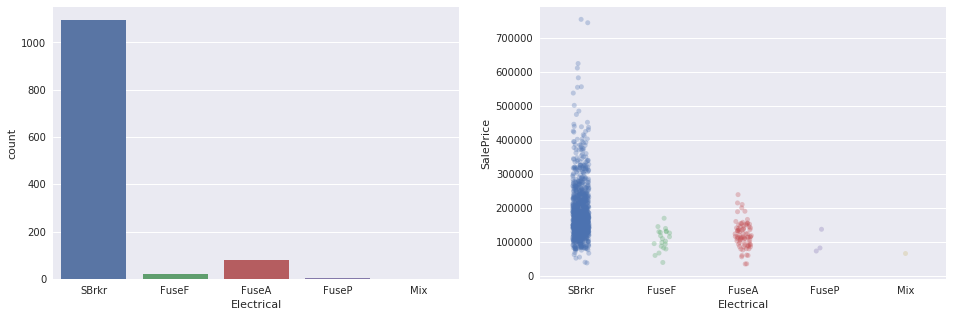

In [47]:
# select the values which are not missing
Electrical_Price = trainDataDF[['Electrical', 'SalePrice']]

_, ax = plt.subplots(1, 2, figsize=(16, 5))

# plot the distribution of Electrical
sns.countplot(x = Electrical_Price.Electrical,
              ax = ax[0])

# plot the strip plot for Electrical and SalePrice
sns.stripplot(x = Electrical_Price.Electrical, 
              y = Electrical_Price.SalePrice, 
              alpha = 0.3,
              jitter = True,
              ax=ax[1])

plt.show()

Since the great majority of entries is 'SBrkr' (Standard Circuit Breakers & Romex) and this category also spans the same sale prices of the others, we can assign this missing value to the most frequent category in the training set.

In [48]:
cleanTestDataDF.fillna(value={'Electrical': 'SBrkr'},
                       inplace=True)

Let's do a final check for missing values:

In [49]:
missingTest = cleanTestDataDF.isnull().sum()
missingTest = missingTest[missingTest > 0]
print("There are {} remaining missing values in the test data.".format(len(missingTest)))

There are 0 remaining missing values in the test data.


### 2.1.6 Correlation analysis

Before closing this sub-section regarding data cleaning, it is a good idea to look at the changes in our data.<br>
We did not plot all the features we modified because the number of missing values was not high enough to appriciate visually the change. Anyway we are sure that the cleaning will lead to an improvement on the final performance of the model.

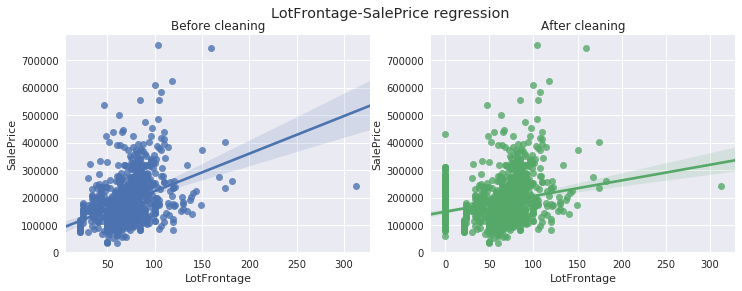

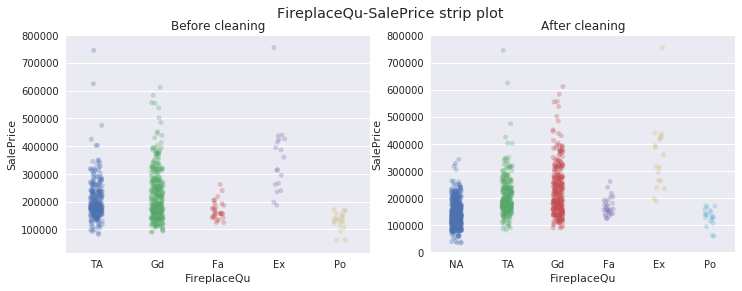

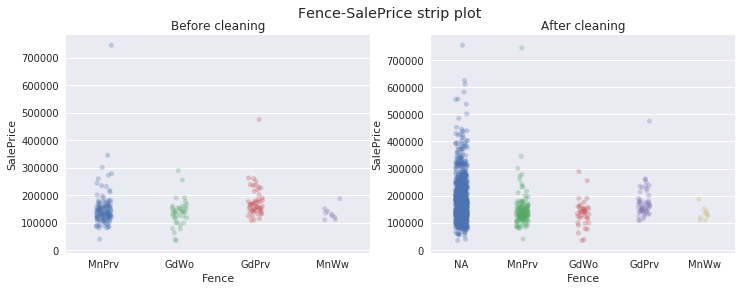

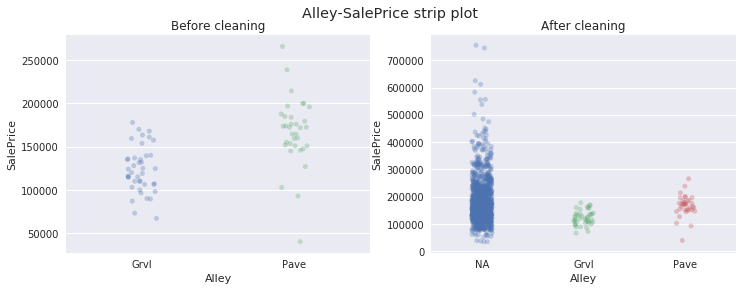

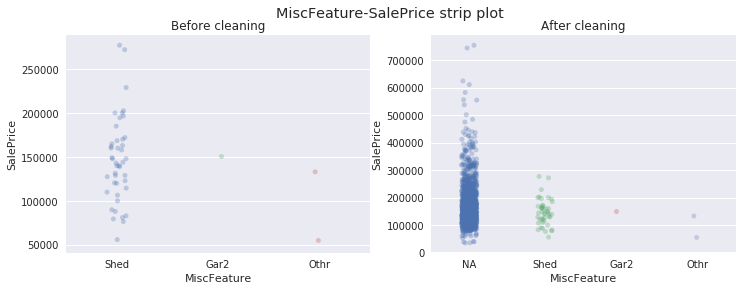

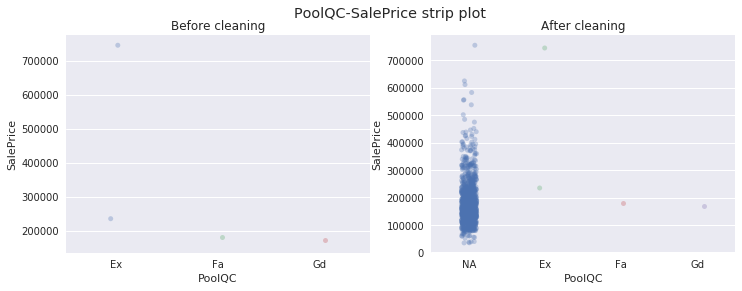

In [50]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.regplot(x = trainDataDF.LotFrontage, 
            y = trainDataDF.SalePrice,
            ax = ax[0])

sns.regplot(x = cleanTrainDataDF.LotFrontage, 
            y = cleanTrainDataDF.SalePrice,
            ax = ax[1])

ax[0].set_title("Before cleaning")
ax[1].set_title("After cleaning")
plt.suptitle("LotFrontage-SalePrice regression")
plt.show()

for featureName in ['FireplaceQu', 
                    'Fence', 
                    'Alley', 
                    'MiscFeature', 
                    'PoolQC']:

    _, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.stripplot(x = trainDataDF[featureName], 
                  y = trainDataDF.SalePrice, 
                  alpha = 0.3,
                  jitter = True,
                  ax=ax[0])
    
    sns.stripplot(x = cleanTrainDataDF[featureName], 
                  y = cleanTrainDataDF.SalePrice, 
                  alpha = 0.3,
                  jitter = True,
                  ax=ax[1])
    
    if len(plt.xticks()[1]) > 6:
        ax[0].set_xticklabels(labels=plt.xticks()[1], rotation=60)
        ax[1].set_xticklabels(labels=plt.xticks()[1], rotation=60)

    ax[0].set_title("Before cleaning")
    ax[1].set_title("After cleaning")
    plt.suptitle("{}-SalePrice strip plot".format(featureName))
    plt.show()

We can clearly see how in the LotFrontage case, the correlation with SalePrice has decreased after the introduction of approximatively 200 values on 0. Unfortunately there is nothing to do about it for now, maybe later we will be able to smooth this phenomena by applying some feature engineering.<br>

Cleaning the features generally has a positive impact on the model because we are allowed to use more training data. Anyway, most of the plots above show how the majority of data lays on a single category with high variance on the `SalePrice`, meaning that many features do not bring a lot of information to our model and will probably be removed later.

### 2.1.7 Outliers removal


Outliers removal is a critical section of preprocessing, we decide to remove just one datapoint in orther to avoid removing too much information from our model. Anyway, this little step lead to a great improvement of performance because not all the models we are using are robust to outliers.

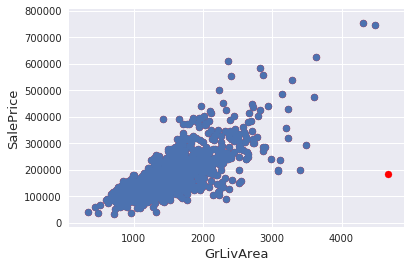

In [51]:
fig, ax = plt.subplots()
ax.scatter(cleanTrainDataDF['GrLivArea'], cleanTrainDataDF['SalePrice'], color = 'r')

# locate the outlier and remove it
outlier = cleanTrainDataDF.loc[(cleanTrainDataDF.GrLivArea > 3800).values & (cleanTrainDataDF.SalePrice < 300000).values]
cleanTrainDataDF.drop(outlier.index, inplace=True)

ax.scatter(cleanTrainDataDF['GrLivArea'], cleanTrainDataDF['SalePrice'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 2.2 Features encoding

We already had an hard time in trying to see the correlation of categorical variables due to the presence of features that use string values. Moreover, the regression model we will build works with numerical values. Therefore it is necessary to encode the categorical (and some of the ordinal) features properly.<br>
Obviously, in order to make the model work, all the data that we will input must respect the same encoding, so we will encode in the same way the test data.

### 2.2.1 Ordinal features

The LabelEncoder will encode the different categories in numbers, in order to ease the future construction of new feature and we added to each encoding the category NA as first field, this will be the one mapped to 0 (we are not adding any new category, we are just shifting on the right the values of the categorical features so that we only have zeros when there is a real lack of the feature).

In [52]:
featuresEncodings = {'LotShape' : ['NA', 'Reg', 'IR1', 'IR2', 'IR3'],
                        'LandSlope' : ['NA', 'Gtl', 'Mod', 'Sev'],
                        'ExterQual' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        'ExterCond' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        'BsmtQual' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        'BsmtCond' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        'BsmtExposure' : ['NA', 'No', 'Mn', 'Av', 'Gd'],
                        'BsmtFinType1' : ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                        'BsmtFinType2' : ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                        'HeatingQC' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        'KitchenQual' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        'Functional' : ['NA', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
                        'FireplaceQu' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        'GarageFinish' : ['NA', 'Unf', 'RFn', 'Fin'],
                        'GarageQual' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        'GarageCond' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                        'PavedDrive' : ['NA', 'N', 'P', 'Y'],
                        'PoolQC' : ['NA', 'Fa', 'TA', 'Gd', 'Ex'],
                        'Fence' : ['NA', 'MnWw', 'GdWo', 'MnPrv','GdPrv']}

# the features to encode are the ones with object data type
ordinalFeaturesToEncode = ordinalFeaturesDF.select_dtypes(include=[np.dtype('object')]).columns.values

# create the encoder
encoder = LabelEncoder()

# encode ordinal features
encodTrainDataDF = cleanTrainDataDF.copy(deep=True)
encodTestDataDF = cleanTestDataDF.copy(deep=True)

for featureName in ordinalFeaturesToEncode:
    encoder.fit(featuresEncodings[featureName])
    
    # encode the train data
    encodTrainDataDF[featureName] = encoder.transform(encodTrainDataDF[featureName])
    
    # encode the test data
    encodTestDataDF[featureName] = encoder.transform(encodTestDataDF[featureName])

Now that we don't have any missing values and the ordinal features are encoded, we can look again at the correlation heat map to get other insights regarding our features. Later we will use this information for some features engineering.

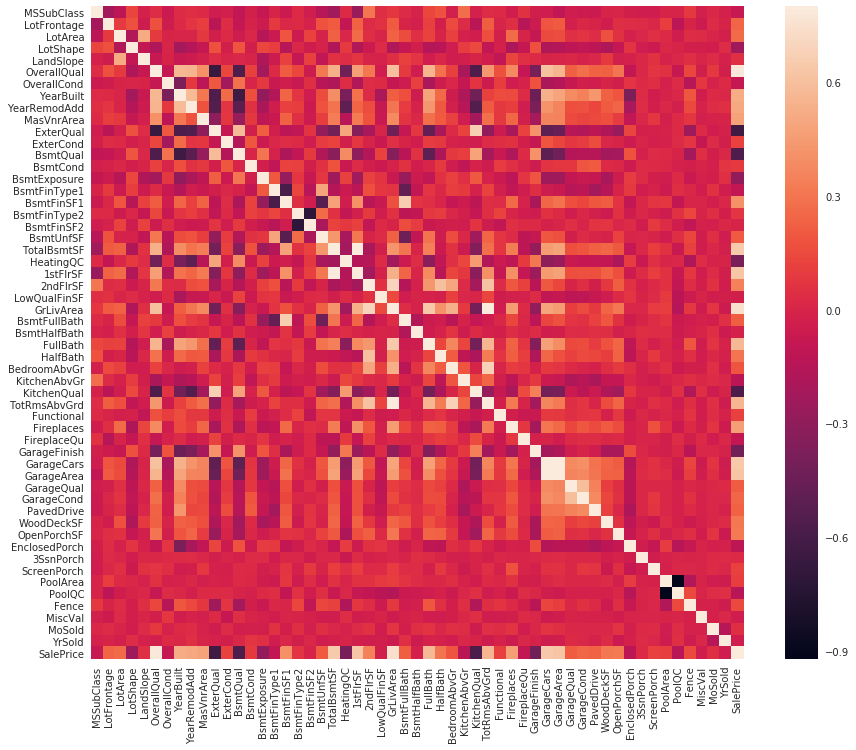

In [53]:
#correlation matrix
corrmat = encodTrainDataDF.corr()
_, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, 
            vmax=.8, 
            square=True, 
            ax = ax)
plt.show()

From this new plot we can extract many information, the most relevant features are:

In [54]:
# correlation of features with SalePrice
corrSalePrice = dict(encodTrainDataDF.corr()['SalePrice'])

# remove useless features
del corrSalePrice['SalePrice']

corrSalePriceList = list(corrSalePrice.items())
corrSalePriceList = sorted(corrSalePriceList, key=lambda x: abs(x[1]), reverse = True)
# find features with relevant correlation
for feat in filter(lambda x: abs(x[1]) >= 0.4, corrSalePriceList):
    print("{}\t{}".format(feat[0], feat[1]))

OverallQual	0.7916698013161683
GrLivArea	0.7520235071836728
TotalBsmtSF	0.6484400732118987
GarageCars	0.6416459091790055
ExterQual	-0.6314771583620541
1stFlrSF	0.6256926819490072
GarageArea	0.6242384002970536
KitchenQual	-0.5754310685917264
FullBath	0.57340637216933
BsmtQual	-0.5658824003469404
TotRmsAbvGrd	0.5611663983370438
YearBuilt	0.5234608192562353
YearRemodAdd	0.5101457504466282
MasVnrArea	0.48387667178203514
Fireplaces	0.4585770961660634
GarageFinish	-0.42333616844930627
BsmtFinSF1	0.4103514059790885


By looking at the heat map we can see that some of them have a very high correlation, for example, `GarageCars` and `GarageArea`, or `OverallQual` and `ExterQual` so we will later try to combine and reduce them. Moreover we can already see a large number of features that have low correlation with the other data and `SalePrice` (from `EnclosedPorch` to `YrSold`), we expected these results from the previous analysis: they are mainly due to their distributions which, has we noted, are concentrated over a single value or category.

### 2.2.2 Categorical features

Using the method get_dummies with drop_first=True we will generate a number of dummy variables equal to the number of categories minus one (it is not needed to encode the information, this way we escape the so called <i>dummy variable trap</i>).

The great advantage of dummy encoding is that it doesn’t impose any ordering on our data and ensures that the distance between each pair of values (neighbourhoods in this case) is the same. However, this comes at a price. Depending on the number of possible values taken by our categorical feature, it can greatly increase the dimensionality of our problem. Moreover, the new features will almost invariably be sparse: that is, the majority of entries will be zeros, particularly if our original categorical variable had a large number of classes. Both of these facts could lead to problems when modelling.<br>

For this step we will merge the training set and test set because if a categorical feature has some some category in the train data but not in the test data (and viceversa) then we will have different features in the two datasets, leading to an incompatibility of the test data with the model.

In [55]:
encodDataDF = pd.concat([encodTrainDataDF, encodTestDataDF], axis=0, ignore_index=True)
# encode categorical features
encodDataDF = pd.get_dummies(encodDataDF,  
                             drop_first = True)

# show some of the new encoded features
print(encodDataDF.columns[150:])
print("After encoding, there are {} features".format(len(encodDataDF.columns)))

# fill the missing values with 0: the category was missing
encodDataDF.fillna(value=0,
                   inplace=True)

# split train data and test data
encodTrainDataDF = encodDataDF.head(len(encodTrainDataDF))
encodTestDataDF = encodDataDF.tail(len(encodTestDataDF))

Index(['MiscFeature_Shed', 'MiscFeature_TenC', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_

The new dummy features respect the feature_category format.<br>
It can be noticed how the number of features exploded. As previously said, this could be a problem, therefore at the end of the preprocessing section we will perform some feature selection.

## 2.3 Features Engineering

The main objective of feature engineering is to improve the quality of our dataset to obtain better performance. In order to do so, we want to enforce some properties into our training data:
 - <b>Normality</b>: data should look like a normal distribution to improve the result. Even if this property loses its importance as the dataset gets bigger, it is important to enforce it because it allows to avoid other problems such as heteroscedacity.

 - <b>Homoscedasticity</b>: it refers to the assumption that dependent variables exhibit equal levels of variance across the range of predictor variables. This implies that the error is the same across all values of the features.

 - <b>Linearity</b>: of course, the clearer is the linear relationship between independent and dependent variables, the better are going to be the model parameters and predictions.

 - <b>Absence of correlated errors</b>: they underline relationships between variables that need to be removed.
 
A good features engineering will lead to flexibility in the model choice and so simpler models, and overall better results.

### 2.3.1 Features Construction

In the previous analysis of data we noticed multiple logical and statistical relationships between the features of the dataset, in order to avoid correlated errors and improve the model we will try to create some new features that try to incorporate the information contained in the others.

A first example of new feature is the combination between the general Lot-related features: `LotShape`, `LotFrontage` and `LotArea`. In order to merge the information in a coherent way it is good to study the correlation with `SalePrice` and between the features.

In [56]:
# correlation with sale price
print("LotShape - SalePrice:\t{}".format(encodTrainDataDF.SalePrice.corr(encodTrainDataDF.LotShape)))
print("LotFrontage - SalePrice:{}".format(encodTrainDataDF.LotFrontage.corr(encodTrainDataDF.SalePrice)))
print("LotArea - SalePrice:\t{}".format(encodTrainDataDF.LotArea.corr(encodTrainDataDF.SalePrice)))
print()
# correlation between variables
print("LotShape - LotFrontage:\t{}".format(encodTrainDataDF.LotFrontage.corr(encodTrainDataDF.LotShape)))
print("LotArea - LotFrontage:\t{}".format(encodTrainDataDF.LotFrontage.corr(encodTrainDataDF.LotArea)))
print("LotArea - LotShape:\t{}".format(encodTrainDataDF.LotArea.corr(encodTrainDataDF.LotShape)))

LotShape - SalePrice:	-0.24718377111961437
LotFrontage - SalePrice:0.24150135170068562
LotArea - SalePrice:	0.2675810807312542

LotShape - LotFrontage:	0.1741753410432366
LotArea - LotFrontage:	0.09044770885972672
LotArea - LotShape:	-0.1620118208275251


These variables don't have a particularly relevant correlation neither with `SalePrice` nor between them, but their combination is a good example of a possible way to create a new feature. The correlation of the new feature with `SalePrice` is higher than the one of the single features, we combined them taking care of their correlations and their encodinds, for example, `LotFrontage` has a positive correlation with `LotShape` while for `LotArea` it is negative; for this reason we multiplied the latter for the opposite of `LotArea` + 4 because we know that it's values go from 0 to 4.

In [57]:
print("LotFrontage * LotShape + LotArea * (4-LotShape) - SalePrice:")
print(encodTrainDataDF.SalePrice.corr(encodTrainDataDF.LotFrontage*encodTrainDataDF.LotShape + encodTrainDataDF.LotArea * (4-encodTrainDataDF.LotShape)))

LotFrontage * LotShape + LotArea * (4-LotShape) - SalePrice:
0.2917511396949749


Other possible "logical" combination of features are the following:

In [58]:
# correlation with sale price
print("OverallQual - SalePrice:\t{}".format(encodTrainDataDF.OverallQual.corr(encodTrainDataDF.SalePrice)))
print("OverallCond - SalePrice:\t{}".format(encodTrainDataDF.OverallCond.corr(encodTrainDataDF.SalePrice)))
print()
# correlation between features
print("OverallCond - OverallQual:\t{}".format(encodTrainDataDF.OverallCond.corr(encodTrainDataDF.OverallQual)))
print()
# correlation of the new feature
print("(100 * OverallQual - OverallCond) - SalePrice:\t{}".format(encodTrainDataDF.SalePrice.corr(100*encodTrainDataDF.OverallQual - encodTrainDataDF.OverallCond)))

OverallQual - SalePrice:	0.7916698013161672
OverallCond - SalePrice:	-0.082571604472623

OverallCond - OverallQual:	-0.08014109196457422

(100 * OverallQual - OverallCond) - SalePrice:	0.7917991402540017


In [59]:
# correlation with sale price
print("ExterQual - SalePrice:\t{}".format(encodTrainDataDF.SalePrice.corr(encodTrainDataDF.ExterQual)))
print("ExterCond - SalePrice:\t{}".format(encodTrainDataDF.ExterCond.corr(encodTrainDataDF.SalePrice)))
print()
# correlation between features
print("ExterCond - ExterQual:\t{}".format(encodTrainDataDF.ExterCond.corr(encodTrainDataDF.ExterQual)))
print()
# correlation of the new feature
print("(ExterCond - ExterQual) - SalePrice:\t{}".format(encodTrainDataDF.SalePrice.corr(-encodTrainDataDF.ExterQual + encodTrainDataDF.ExterCond)))

ExterQual - SalePrice:	-0.6314771583620501
ExterCond - SalePrice:	0.12366007035379055

ExterCond - ExterQual:	-0.08655427132973725

(ExterCond - ExterQual) - SalePrice:	0.5707804669187877


As we can see, even if concettualy both the combinations have a meaning, this is not enough to lead to the creation of a good new feature. We could think that the difference in correlation with `SalePrice` is one of the factors leading to these poor results. Let's try some other combinations.

In [60]:
# correlation with sale price
print("ExterQual - SalePrice:\t{}".format(encodTrainDataDF.SalePrice.corr(encodTrainDataDF.ExterQual)))
print("OverallQual - SalePrice:{}".format(encodTrainDataDF.OverallQual.corr(encodTrainDataDF.SalePrice)))
print("BsmtQual - SalePrice:\t{}".format(encodTrainDataDF.BsmtQual.corr(encodTrainDataDF.SalePrice)))
print()
# correlation between features
print("ExterQual - OverallQual:{}".format(encodTrainDataDF.OverallQual.corr(encodTrainDataDF.ExterQual)))
print("ExterQual - BsmtQual:\t{}".format(encodTrainDataDF.ExterQual.corr(encodTrainDataDF.BsmtQual)))
print("BsmtQual - OverallQual:\t{}".format(encodTrainDataDF.BsmtQual.corr(encodTrainDataDF.OverallQual)))
print()
# correlation of the new feature
print("(OverallQual^3 - ExterQual - BsmtQual) - SalePrice:")
print(encodTrainDataDF.SalePrice.corr(-encodTrainDataDF.ExterQual + encodTrainDataDF.OverallQual**3 - encodTrainDataDF.BsmtQual))

ExterQual - SalePrice:	-0.6314771583620501
OverallQual - SalePrice:0.7916698013161672
BsmtQual - SalePrice:	-0.5658824003469385

ExterQual - OverallQual:-0.6580776607135458
ExterQual - BsmtQual:	0.5827055852169797
BsmtQual - OverallQual:	-0.568430340720731

(OverallQual^3 - ExterQual - BsmtQual) - SalePrice:
0.836347589578812


In [61]:
# correlation with sale price
print("GarageCars - SalePrice:\t{}".format(encodTrainDataDF.SalePrice.corr(encodTrainDataDF.GarageCars)))
print("GarageArea - SalePrice:\t{}".format(encodTrainDataDF.SalePrice.corr(encodTrainDataDF.GarageArea)))
print("GarageQual - SalePrice:\t{}".format(encodTrainDataDF.SalePrice.corr(encodTrainDataDF.GarageQual)))
print("GarageCond - SalePrice:\t{}".format(encodTrainDataDF.SalePrice.corr(encodTrainDataDF.GarageCond)))
print()
# correlation of the new feature
print("(GarageCars + GarageArea + GarageQual + GarageCars^GarageCond) - SalePrice:")
print(encodTrainDataDF.SalePrice.corr(encodTrainDataDF.GarageCars + encodTrainDataDF.GarageArea + encodTrainDataDF.GarageQual + encodTrainDataDF.GarageCars**encodTrainDataDF.GarageCond))

GarageCars - SalePrice:	0.6416459091790032
GarageArea - SalePrice:	0.6242384002970526
GarageQual - SalePrice:	0.2102349922370995
GarageCond - SalePrice:	0.248318795419205

(GarageCars + GarageArea + GarageQual + GarageCars^GarageCond) - SalePrice:
0.6615778241023315


These last experiments have better results so we will add these features to our dataset. Generally, feature construction is a part of feature engineering that is meant as an artform, the best results depend on the ability of who is crafting the features and the time spent studying the features, their structures, distributions and relations.

In [62]:
# create quality feature and add it to the dataset
Quality = -encodTrainDataDF.ExterQual + encodTrainDataDF.OverallQual**3 - encodTrainDataDF.BsmtQual
QualityDF = pd.DataFrame(Quality, columns=['Quality'])

engTrainDataDF = encodTrainDataDF.copy(deep=True)
engTrainDataDF = engTrainDataDF.join(QualityDF.Quality)

# create garage feature and add it to the dataset
Garage = encodTrainDataDF.GarageCars + encodTrainDataDF.GarageArea + encodTrainDataDF.GarageQual + encodTrainDataDF.GarageCars**encodTrainDataDF.GarageCond
GarageDF = pd.DataFrame(Garage, columns=['Garage'])

engTrainDataDF = engTrainDataDF.join(GarageDF.Garage)

In [63]:
# repeat the previous for the test data
QualityTest = -encodTestDataDF.ExterQual + encodTestDataDF.OverallQual**3 - encodTestDataDF.BsmtQual
QualityTestDF = pd.DataFrame(QualityTest, columns=['Quality'])

engTestDataDF = encodTestDataDF.copy(deep=True)
engTestDataDF = engTestDataDF.join(QualityTestDF.Quality)

GarageTest = encodTestDataDF.GarageCars + encodTestDataDF.GarageArea + encodTestDataDF.GarageQual + encodTestDataDF.GarageCars**encodTestDataDF.GarageCond
GarageTestDF = pd.DataFrame(GarageTest, columns=['Garage'])

engTestDataDF = engTestDataDF.join(GarageTestDF.Garage)

### 2.3.2 Normalization

We already discussed the importance of normalization, in particular, at the beginning of the notebook, we saw how to improve the distribution of `SalePrice`.

In [64]:
engTrainDataDF.SalePrice = np.log(encodTrainDataDF.SalePrice)

Now we should try to normalize the other features, in order to do so we will use the boxcox transformation. This process does not make sense for all the features, some of them need just some scaling or nothing at all, some others don't show any sign of improvement. After having studied the scatter plot, the distribution of the relevant features (not the boolean ones) and the changes in the correlation with `SalePrice` we decided to transform the following features.<br>
(we will not show the plots for all the features because this would make the notebook verbose and unreadable)

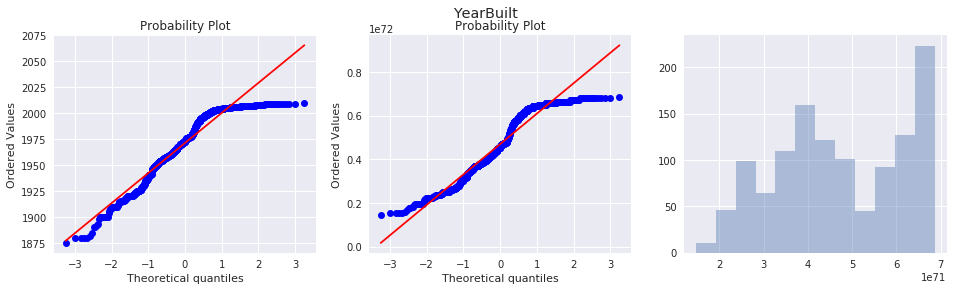

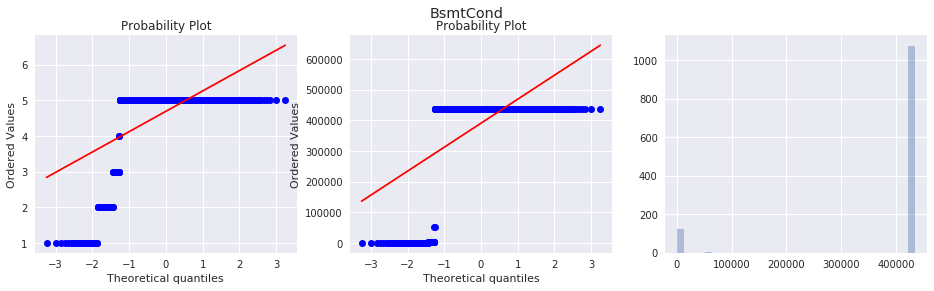

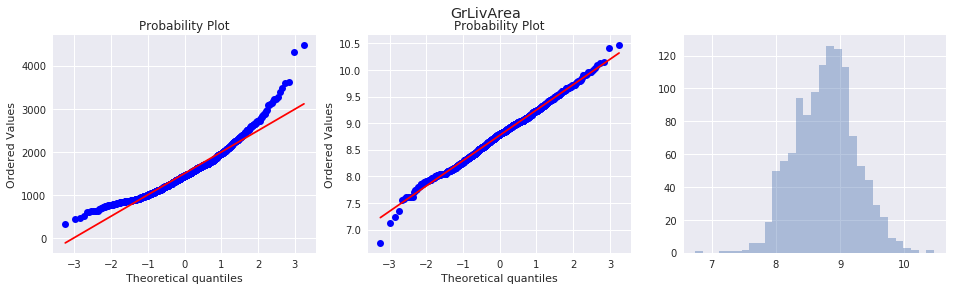

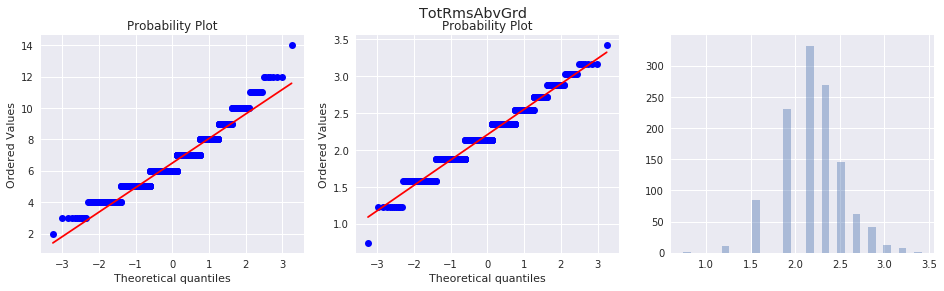

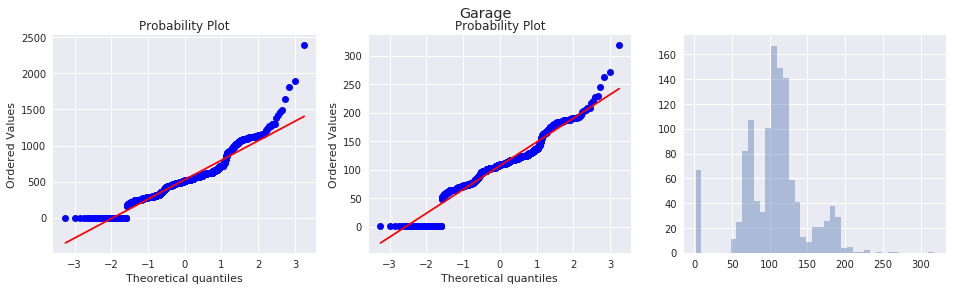

In [65]:
features = ['YearBuilt', 'BsmtCond', 'GrLivArea', 'TotRmsAbvGrd', 'Garage']
for featureName in features:

    _, ax = plt.subplots(1, 3, figsize=(16, 4))

    # QQplot before transformation
    stats.probplot(engTrainDataDF[featureName], dist=stats.norm, plot=ax[0])

    # apply boxcox transformation
    transformedFeature = boxcox(engTrainDataDF[featureName])[0]
    
    # QQplot after transformation
    stats.probplot(transformedFeature, dist=stats.norm, plot=ax[1])

    # new distribution of the feature
    sns.distplot(transformedFeature,
                 ax=ax[2],
                 kde=False)

    # update the dataset
    engTrainDataDF[featureName] = transformedFeature
    
    # update the test set
    transformedFeatureTest = boxcox(engTestDataDF[featureName])[0]
    engTestDataDF[featureName] = transformedFeatureTest
    
    # changes in the correlation
    #before = np.corrcoef(engTrainDataDF[featureName], engTrainDataDF.SalePrice)[0][1]
    #after = np.corrcoef(transformedFeature, engTrainDataDF.SalePrice)[0][1]

    plt.suptitle(featureName)
    plt.show()

### 2.3.3 Feature Scaling

In order to scale the features we will use the MinMaxScaler using a range from 0 to 10 in order to avoid too small numbers (e.g. if we use [0, 1]).

In [66]:
scaleTrainDataDF = engTrainDataDF.copy(deep=True)
scaleTestDataDF = engTestDataDF.copy(deep=True)

scaler = MinMaxScaler(feature_range = (0, 10))
for feature in ordinalFeaturesDF.columns:
    scaleTrainDataDF[feature] = scaler.fit_transform(engTrainDataDF[feature].values.reshape(-1, 1))
    scaleTestDataDF[feature] = scaler.fit_transform(engTestDataDF[feature].values.reshape(-1, 1))

for feature in numericalFeaturesDF.columns:
    if feature == 'GarageYrBlt':
        continue
    scaleTrainDataDF[feature] = scaler.fit_transform(engTrainDataDF[feature].values.reshape(-1, 1))
    scaleTestDataDF[feature] = scaler.fit_transform(engTestDataDF[feature].values.reshape(-1, 1))

## 2.4 Features Selection

The last step of our pre-processing pipeline is feature selection. Multiple times during the process of pre-processing we explained the importance of this step: multiple features do not bring any information (or any new information) to the model, therefore it is necessary to truncate some features. Moreover, this is going to be helpful to make the models we will use more flexible and precise.

Our approach to feature selection will exploit two criteria:
 - <b>Mutual information for continuous variables</b><br>
 Mutual information between two random variables is a non-negative value which measures the dependency between them. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

 - <b>p-Value</b><br>
 After extracting the correlation between features and the target, the p-value is computed and used to select the best features.
 
After the selection, the two sets of features are joined and feeded to the model.

In [67]:
# create selector using mutual information
selector = SelectKBest(mutual_info_regression, k='all')

# fit the selector
selector.fit(X = scaleTrainDataDF.drop(columns=['SalePrice']), 
             y = scaleTrainDataDF.SalePrice)

# remove the features with lowest scores
featuresToRemoveMI = scaleTrainDataDF.drop(columns=['SalePrice']).columns.values[np.where(selector.scores_ <= 0.001)]
selMITrainDataDF = scaleTrainDataDF.drop(columns=['SalePrice']).drop(columns=featuresToRemoveMI)

print("{} features removed using MI.".format(len(featuresToRemoveMI)))

64 features removed using MI.


In [68]:
# create selector using regression
selector = SelectKBest(f_regression, k='all')

# fit the selector
selector.fit(X = scaleTrainDataDF.drop(columns=['SalePrice']), 
             y = scaleTrainDataDF.SalePrice)

# remove the features with lowest p values
featuresToRemoveFreg = scaleTrainDataDF.drop(columns=['SalePrice']).columns.values[np.where(selector.pvalues_ <= 0.05)]
selFregTrainDataDF = scaleTrainDataDF.drop(columns=['SalePrice']).drop(columns=featuresToRemoveFreg)

print("{} features removed using the p-value.".format(len(featuresToRemoveFreg)))

136 features removed using the p-value.


In [69]:
# find common features in the two sets
commonFeatures = set.intersection(set(selFregTrainDataDF.columns), set(selMITrainDataDF.columns))

# make the union of the two sets
selectTrainDataDF = selFregTrainDataDF.drop(columns=list(commonFeatures)).join(selMITrainDataDF)

# add back the SalePrice
selectTrainDataDF = selectTrainDataDF.join(scaleTrainDataDF.SalePrice)

print("There are {} remaining features.".format(len(selectTrainDataDF.columns)))

There are 186 remaining features.


In [70]:
# apply feature selection to test data
featuresToRemove = set(scaleTrainDataDF.columns)-set(selectTrainDataDF.columns)
selectTestDataDF = scaleTestDataDF.drop(columns=featuresToRemove)

print("There are {} remaining test features.".format(len(selectTestDataDF.columns)))

There are 186 remaining test features.


# 3 Defining a modeling approach to the problem

Clearly, the problem analyzed in this work belongs to the big category of supervised learning. In order to predict the `SalePrice` values we performed a regression on the features, in particular we explored several regression approaches, from simplest linear regression to more advanced ensemble methods.

## 3.1 Linear regression

The linear regression uses a linear approach to model the relationship between input and output variables. The model makes estimations using a linear predictor function, which in the trivial case is a linear combination of the features. 
<br>
$$y_{i}=\beta _{0}1+\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i}=\mathbf {x} _{i}^{\top }{\boldsymbol {\beta }}+\varepsilon _{i},\qquad i=1,\ldots ,n, $$
<br>
Training the model corresponds to finding the coefficients that minimize the distance between the predicted values and the actual values. 
With one input variable and one output variable, the linear regression corresponds to finding the line that best approximates the distribution of the points.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png)

There exist many different ways to express this distance, i.e. the cost function, depending on the type of regression that is performed. In the case of linear regression the Mean Square error is a good choice:

$$ \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.$$



Different strategies exist to find the minimum. The most common is the Gradient descent, that consist in an iterative update of the parameters of our model, based on the magnitude and direction of the gradient of our current cost function.<br>

This linear regression algorithm works better when a linear relationship between independent and dependent variables already exists. Appropriate transformations to the dataset can help to improve the performance of the model.
<br>

## 3.2 Regularization
One of the main issues of supervised machine learning is overfitting, that is the bad capacity of the model to generalize due to a "too-good" fit to the training data. The main approach used to solve this issues is called regularization, it adds a regularization term to the cost function penalizing models that are too complex and therefore prone to overfit the data.

<br>$$\text{obj}(\theta) = L(\theta) + \Omega(\theta)$$<br>

$L(\theta)$ is the error function while $\Omega(\theta)$ is the regularization factor which avoids the overfitting of the model, also known as `variance error`. 
We applied two main types of regularization: L1 (with the Lasso model) and L2 (with the Ridge model). The difference between the two consists in the form of the regularization term:
![](http://www.chioka.in/wp-content/uploads/2013/12/least_squares_l11.png)
![](http://www.chioka.in/wp-content/uploads/2013/12/least_squares_l2.png)

Even if at a first sight this could seem like just a little difference, the impact is relevant and it can be summarized in the following table:

![](http://www.chioka.in/wp-content/uploads/2013/12/L1-vs-L2-properties-regularization.png)

The main practical difference between the two kinds of regularization consists in their effect on the parameters values: while the first one has a tendence to eliminate some features, the other one just decreases their values.

Of course, both the approaches have their pros and cons, the ElasticNet approach combines the two regularization using two parameters to weight their sum.
<br>

## 3.3 Ensemble methods
### 3.3.1 The XGboost model
A more sophisticate approach is the “Extreme Gradient Boosting” (XGboost), which uses the boosting paradigm for ensemble methods. In particular, this approach exploits the tree ensemble technique: it combines classification and regression trees (CART) assigning a score based on the performance of the model to each of their leaves. The final prediction is computed as a combination of the results obtained from each tree.

The following picture (from the XGBoost documentation) helps to visualize the model.

![](https://raw.githubusercontent.com/dmlc/web-data/master/xgboost/model/twocart.png)
(picture from [http://xgboost.readthedocs.io/en/latest/model.html](http://xgboost.readthedocs.io/en/latest/model.html))<br>

As we can see, every tree returns a score and the overall score is the sum of the two:

$$\hat{y}_i = \sum_{k=1}^K f_k(x_i),\quad f_k \in \mathcal{F} $$

With $f_k(x_i)$ is the function that returns the score of the leaf to which $x_i$ belongs to for the tree $k$ and $\mathcal{F}$ is the sets of CARTs.

Again, the objective is to minimize the objective function which now has the form of:

$$\text{obj}(\theta) = \sum_i^n l(y_i, \hat{y}_i) + \sum_{k=1}^K \Omega(f_k)$$

In order to optimize the tree functions it is not possible to use gradient descent as we do with the linear regression or to train all the trees at once.<br>
The algorithm opts instead for and additive strategy: at each step, a new tree is computed that will minimize the objective function.

$$\begin{split}\hat{y}_i^{(0)} &= 0\\
\hat{y}_i^{(1)} &= f_1(x_i) = \hat{y}_i^{(0)} + f_1(x_i)\\
\hat{y}_i^{(2)} &= f_1(x_i) + f_2(x_i)= \hat{y}_i^{(1)} + f_2(x_i)\\
&\dots\\
\hat{y}_i^{(t)} &= \sum_{k=1}^t f_k(x_i)= \hat{y}_i^{(t-1)} + f_t(x_i)
\end{split}$$

The XGBoost also provides both L1 and L2 regularization with implicit feature selection. This makes the model more resilient to a less elaborated dataset. 

Finally, XGBoost offers two main advantages: execution speed and performances, which are obtained by the application of the following paradigms:
- Parallelization of the tree construction exploiting all the CPU cores
- Distributed computing for training on large datasets
- Out-of-Core Computing for datasets which don't fit into memory
- Cache Optimization of data structure to best exploit the hardware platform



<!--- The biggest advantage of the XGBoost with respect to standard linear regression methods, is the resilience to poorly elaborated dataset. -->

### 3.3.2 Stacked generalization

Another way of doing “Model ensembling” is to combine the results of different models, for example by taking the average their outputs. Anyway, more sophisticated techiniques exist such as the stacked generalization.<br>
The principle behind this algorithm is very simple: multiple models (submodels) are trained on a certain dataset, then, a new dataset is built from the predictions made by these models and the actual value.

| Submodel1 | Submodel2 | Real value |
|---|---|---|
|1|0|0|
|1|1|1|
|1|1|0|


Another model, the so called aggregator model is trained on this dataset to combine optimally the results of the different submodels. As an example, for the models averaging case, the aggregator model is simply the average function.

In order to get the results the stacking function will perform the following actions:

- train a list of models.
- use the models to make predictions and create a new stacked dataset.
- train an aggregator model on the stacked dataset.
- use the sub-models and aggregator model to make predictions on the test dataset.

One of the main advantages of this approach is that we’re using the predictions of the base models as features, so-called meta-features, for the stacked model. So, it is able to discern where each model performs well and where each model performs poorly.

To improve the performances, the submodels must have different 'skills' on the problem, but they do not need to perform optimally. This means that there is no need to perform particular tunings of the submodels as long as they show some advantage over a baseline prediction.

From another perspective, it is important that submodels produce different and uncorrelated predictions because stacking works best when the predictions that are combined are all skillful, but in different ways. This may be achieved by using algorithms that use very different internal representations and/or models trained on different representations or projections of the training data.

##  3.4 Steps followed
Our objective is to implement different forms of regression and compare their results. We expect some regression technique to perform better than others, therefore we will analyse performances and try to improve the initial prediction s.

- Start with a simple linear regression without regularization. We do not expect good results but it will give us a baseline for other models performance.
- Explore the effects of the different regularizations: apply Lasso, Ridge and ElasticNet, using a grid search approach to find the best parameters.
- Evaluate the performance of a more complex model like XGBoost and compare the performance tuning using both grid search and bayesian optimization.
- Combine multiple models: averaging and stacking.

# 4 Build and validate the models

## 4.1 Simple linear regression

Let's start with the simplest regression without any kind of regularization. Clearly, considered the simplicity of the model,  and the high number of features, we do not expect to have good results.

In [71]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as skmodels

In [72]:
# get the dataset from the pandas DataFrame
train_dataDF = selectTrainDataDF
train_x = train_dataDF.drop(columns = ['SalePrice']).values
train_y = selectTrainDataDF.SalePrice.values

test_x = selectTestDataDF.values

In [73]:
# create the model
LinRegrMod = skmodels.LinearRegression()

# train the model and validate it using cross validation
n_folds = 10
lin_reg_train_err = np.sqrt(-cross_val_score(LinRegrMod, train_x, train_y, scoring = 'neg_mean_squared_error', cv = n_folds))
print("The average RMSE over {} folds is {} with standard deviation {}.".format(n_folds, lin_reg_train_err.mean(), lin_reg_train_err.std()))

The average RMSE over 10 folds is 0.12522570893052407 with standard deviation 0.016225864140309076.


As expected, results are not that promising (we will see that other models perform much better), but still, thanks to the previous data cleaning and feature engineering, we have got a decent result.

A simple liner regression is not suitable for our problem, but it can be a valuable option and provide a good approximation of the linear relationship between the features and the target, especially with a dataset where the number of features is limited.

## 4.2 Regularization

### 4.2.1 Lasso regularization

As anticipated before, the Lasso method applies L1 regularization.
The influence of the regularization can be set using the hyperparameter `alpha`.
A good, simple and efficient method for finding optimal parameters is the GridSearchCV from the scikit library, it creates a grid over the possible combinations of hyperparameters of the model and then finds the optimal values optimizing a score function computed using cross validation.<br>
The grid search uses the following parameters:
- <b>Estimator</b>: the function that computes the performance of a model, in our case it is the MSE.
- <b>Param_grid</b>: the parameters you want to optimize (e.g. alpha for the regularization).

Despite its semplicity, it is necessary to be careful when using GridSearch: optimizing together too many parameters could lead to a numerical explosion, that is, too many models to be evaluated. A good tradeoff between performance and quality of the solution is to optimize just a few parameters at a time.<br>
Moreover, even if the validation of the model is obtained with a cross-validation tecnique, it can still be possible that the results are dependent on the particular choice of the folds.

In [74]:
from sklearn.grid_search import GridSearchCV

In [75]:
lasso = skmodels.Lasso(random_state=0)

# set a default range of tuning parameters
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]

# execute grid search with cross validation
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error')
clf.fit(train_x, train_y)

# define model with best parameters
ModelLasso = skmodels.Lasso(**clf.best_params_)

print("Lowest rmse reached: ", np.sqrt(-clf.best_score_))
print("Best parameters :", str(clf.best_params_))

Lowest rmse reached:  0.11592618491335291
Best parameters : {'alpha': 0.00023018073130224678}


The results obtained with the Lasso regularization meet our expectations. The performance improves, probably due to the high multicollinearity that characterizes our dataset. Infact, the L1 regularization embeds a covariate selection, that will thus reduce the number of multicollinear features.

### 4.2.2 Ridge regularization

Similarly to the Lasso case, we use the GridSearchCV for finding the optimal `alpha` parameter.

In [76]:
ridge = skmodels.Ridge(random_state=0)

# set range for tuning parameters
alphas = np.logspace(-4, 2, 30)
tuned_parameters = [{'alpha': alphas}]

# execute grid search with folds cross validation
clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error')
clf.fit(train_x, train_y)

# define model with best parameters
ModelRidge = skmodels.Ridge(**clf.best_params_)

print("Lowest rmse reached: ", np.sqrt(-clf.best_score_))
print("Best parameters :", str(clf.best_params_))

Lowest rmse reached:  0.11590802939898874
Best parameters : {'alpha': 14.873521072935118}


It is possible to notice the difference between L1 and L2 regularization parameters. For the latter, alpha has a greater order of magnitude. Moreover, Ridge regularization achieves better performances due to its implementation which is more prone to lower the parameters instead of cutting them out.

### 4.2.3 Elastic Net regularization

This combination of the regularization approaches depends on two parameters:
- `L1_ratio` : the ratio of L1 regularization with respect to L2
- `alpha` : the impact of regularization
These are obtained as follows:
$$\alpha = a + b,\qquad l1_ratio = a / (a + b)$$
where a and b are the weights for the two regularizations. Since Ridge outperforms Lasso regularization, we expect the l1_ratio parameter to be low, preferring the L2 regularization method over the L2. 

In [77]:
elanet = skmodels.ElasticNet(random_state=0, max_iter=10000)

# set range for tuning parameters
alphas = np.logspace(-4, 2, 10)
l1_ratios = np.logspace(-3, 1, 10)
tuned_parameters = [{'alpha': alphas, 'l1_ratio' : l1_ratios}]

# execute grid search with folds cross validation
clf = GridSearchCV(elanet, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error')
clf.fit(train_x, train_y)

# define model with best parameters
ModelElanet = skmodels.ElasticNet(**clf.best_params_)

print("Lowest rmse reached: ", np.sqrt(-clf.best_score_))
print("Best parameters :", str(clf.best_params_))

Lowest rmse reached:  0.11574159752166878
Best parameters : {'alpha': 0.01, 'l1_ratio': 0.021544346900318832}


As proved by the results, combining the two approaches leads to better, even if slightly, performance.

## 4.3 XGBoost
### 4.3.1 First run of the model

The XGBoost algorithm supports a large number of tuning parameters that can highly affect the performance of the model.
Parameters can be divided into three categories:
- <b>General parameters</b>: for the overall functionality of XGBoost
- <b>Booster Parameters</b>: define parameters for the particular booster algorithm used. Generally it is based on trees and parameters can be the max_depth, max_leaf_nodes or learning rate. See later for more details.
- <b>Learning Task parameters</b>: To define the optimization objective and so the metric to be calculated at each step (the type of error)

In [78]:
from xgboost.sklearn import XGBRegressor

In [79]:
# create the model
xgbModel = XGBRegressor()

# train the model and validate it using cross validation
xgboost_err = np.sqrt(-cross_val_score(xgbModel, train_x, train_y, scoring = 'neg_mean_squared_error', cv = n_folds))
print("Root Mean Square Error: {}".format(xgboost_err.mean()))

Root Mean Square Error: 0.12816646255746805


### 4.3.2 Setting the hyperparameters with grid search
Now, it is time to look for optimal parameters.
As it is infeasible to test all the combinations of all the parameters, a good compromise is to fix some parameters and try to modify the others. This way, we will proceed step by step from a reasonable choice of the parameters and then optimize these ones one (or two) at a time.
The parameters to optimize are the following:

- <b>max_depth</b>: the maximum number of nodes allowed in a path from the root to the a leaf in each tree. The higher the value, the more complex will be the model, but as we go deeper, splits become less relevant, causing the model to overfit.
- <b>min_child_weight</b>: minimum sum of instance weight needed in a child. In our case, a linear regression with all the weights equal to 1, this corresponds to minimum number of instances needed in a node to perform a new partition. A higher value will cause the algorithm to be more conservative, but also in this case it may cause overfitting.
- <b>subsample</b> and `colsample_bytree</b> : respectively subsample ratio of the training instance and subsample ration of the features. Sampling from the training set, instead of using all the observations, will cause each tree to be trained on different data at each step, reducing possible overfitting.
- <b>gamma</b> : minimum loss reduction required to make a further partition on a leaf node of the tree. The larger, the more conservative the algorithm will be.
- <b>reg_alpha</b> : L1 regularization term on weights (Lasso regularization)
- <b>reg_lambda</b> : L2 regularization term on weights (Ridge regularization)
- <b>n_estimators</b>: the number of trees that will be fitted at each step.

The parameters max_depth and min_child_weight should be tuned together to find a good trade-off between model bias and variance, i.e. avoid underfitting and overfitting.



#### max_depth and min_child_weight

In [80]:
# define starting parameters
params = {'early_stopping_rounds': 20, 'n_estimators': 200}

xgbModel = XGBRegressor(**params)

# set range for tuning parameters
max_depths = np.arange(3,10,2)
min_child_weights = np.arange(1,6,2)
tuned_parameters = [{'max_depth': max_depths, 'min_child_weight': min_child_weights}]

# execute grid search with folds cross validation
clf = GridSearchCV(xgbModel, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error')
clf.fit(train_x, train_y)

# store optimal values
params.update(clf.best_params_)

print("Lowest rmse reached: ", np.sqrt(-clf.best_score_))
print("Best parameters :", str(clf.best_params_))

Lowest rmse reached:  0.12487005844503303
Best parameters : {'min_child_weight': 3, 'max_depth': 3}


#### gamma

In [81]:
xgbModel = XGBRegressor(**params)

# set range for tuning parameters
gammas = [i/10.0 for i in range(0,5)]
tuned_parameters = [{'gamma': gammas}]

# execute grid search with folds cross validation
clf = GridSearchCV(xgbModel, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error')
clf.fit(train_x, train_y)

# store optimal values
params.update(clf.best_params_)

print("Lowest rmse reached: ", np.sqrt(-clf.best_score_))
print("Best parameters :", str(clf.best_params_))

Lowest rmse reached:  0.12487005844503303
Best parameters : {'gamma': 0.0}


#### subsample and colsample_bytree

In [82]:
xgbModel = XGBRegressor(**params)

# set range for tuning parameters
subsamples = [i/10.0 for i in range(6,10)]
colsample_bytrees = [i/10.0 for i in range(6,10)]
tuned_parameters = [{'subsample': subsamples, 'colsample_bytree' : colsample_bytrees}]

# execute grid search with folds cross validation
clf = GridSearchCV(xgbModel, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error')
clf.fit(train_x, train_y)

# store optimal values
params.update(clf.best_params_)

print("Lowest rmse reached: ", np.sqrt(-clf.best_score_))
print("Best parameters :", str(clf.best_params_))

Lowest rmse reached:  0.12180680363030681
Best parameters : {'subsample': 0.6, 'colsample_bytree': 0.8}


#### reg_alpha and reg_lambda
In this case we are going to divide the research into a coarse one, to extimate the order of magnitude, and a fined one, to have a more precise value.

In [83]:
xgbModel = XGBRegressor(**params)

# set range for tuning parameters
reg_alphas = [0, 1e-3, 1e-2, 0.1, 1]
reg_lambdas = [0, 1e-3, 1e-2, 0.1, 1]
tuned_parameters = [{'reg_alpha': reg_alphas,'reg_lambda': reg_lambdas} ]

# execute grid search with folds cross validation
clf = GridSearchCV(xgbModel, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error')
clf.fit(train_x, train_y)

# store optimal values
params.update(clf.best_params_)

print("Lowest rmse reached: ", np.sqrt(-clf.best_score_))
print("Best parameters :", str(clf.best_params_))

Lowest rmse reached:  0.12118555661217903
Best parameters : {'reg_alpha': 0.1, 'reg_lambda': 1}


In [84]:
xgbModel = XGBRegressor(**params)

# set range for tuning parameters
reg_alphas_ref = [i/10.0 * 1e-1 for i in range(1,10,2)]
reg_alphas_ref += [i * 1e-1 for i in range(1,10,2)] 
reg_lambdas_ref = [i/10.0 * 1e-3 for i in range(1,10,3)]
reg_lambdas_ref += [i * 1e-3 for i in range(1,10,3)] 

tuned_parameters = [{'reg_alpha': reg_alphas_ref,'reg_lambda': reg_lambdas_ref} ]

# execute grid search with folds cross validation
clf = GridSearchCV(xgbModel, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error')
clf.fit(train_x, train_y)

# store optimal values
params.update(clf.best_params_)

print("Lowest rmse reached: ", np.sqrt(-clf.best_score_))
print("Best parameters :", str(clf.best_params_))

Lowest rmse reached:  0.1213221625809204
Best parameters : {'reg_alpha': 0.5, 'reg_lambda': 0.007}


#### learning rate
The choice of the leraning rate is usually particularly relevant since a too big value could lead to divergence while a too small one could lead to slow convergence, therefore we should also consider a good choice of n_estimators.

In [85]:
#Update the n_estimators for smaller learning rates
params.update(n_estimators = 1000, early_stopping_rounds = 20)
xgbModel = XGBRegressor(**params)
# set range for tuning parameters
learning_rates = [0.1, 0.01, 0.001, 0.0001]
tuned_parameters = [{'learning_rate': learning_rates}]

# execute grid search with folds cross validation
clf = GridSearchCV(xgbModel, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error')
clf.fit(train_x, train_y)

# store optimal values
params.update(clf.best_params_)

print("Lowest rmse reached: ", np.sqrt(-clf.best_score_))
print("Best parameters :", str(clf.best_params_))

Lowest rmse reached:  0.1216047051323582
Best parameters : {'learning_rate': 0.1}


In [86]:
# Build the model with the optimal hyper-parameters
xgbModel = XGBRegressor(**params)

# show final parameters
display(params)

{'colsample_bytree': 0.8,
 'early_stopping_rounds': 20,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 1000,
 'reg_alpha': 0.5,
 'reg_lambda': 0.007,
 'subsample': 0.6}

### 4.3.2 Setting the hyperparameters with bayesian optimization

This technique is a more effective way to look for optimal parameters. A brute force approach like the grid search can be time consuming, computationally expensive and inaccurate.

The Bayesian optimization offers a good alternative to this optimization problem, being designed to reach combination of parameters close to the optimal with a reduced number of steps.
To achieve its goal, bayesian optimization works by constructing a posterior distribution of functions that best approximates the objective function. These functions, described by the posterior, although still hard to optimize, are easier to be treated.

In [87]:
from bayes_opt import BayesianOptimization
import xgboost

As the Bayesian Optimization takes as parameter the function to work on, we first need to declare it. We are interested in minimizing the RMSE from the cross validation. So, as the algorithm is designed to optimize, this function will be simply its negative.

In [88]:
# Score function to be maximized by the Bayesian Optimization.  
def XGB_CV(**kwargs):
    # perform fold cross validation
    xgbModel = XGBRegressor(**kwargs)
    xgbModel.fit(train_x, train_y)
    score = np.sqrt(-cross_val_score(xgbModel, train_x, train_y, scoring = 'neg_mean_squared_error', cv = n_folds))
    
    return -score.mean()

Then, it is necessary to specify to the model the ranges where to look for the optmial values of the parameters.

In [89]:
## build the bayesian model
XGB_BO = BayesianOptimization(verbose = 0, f = XGB_CV, pbounds = {
                                        'max_depth': (3, 10),
                                        'min_child_weight': (1, 6),
                                        'gamma': (0, 0.5),
                                        'subsample': (0.6, 1),
                                        'colsample_bytree': (0.6, 1),
                                        'reg_alpha': (1e-3, 1),
                                        'reg_lambda': (1e-3, 1)
                                        })

Finally, the optimization can be run. The init_points parameter specifies the number of initialization steps before the maximation. 

In [ ]:
# Start the bayesian optimization
XGB_BO.maximize(init_points=20, n_iter=100, acq='ei', xi=0.0)

In [91]:
# Update with the optimal parameters
params.update(XGB_BO.res['max'])

# define and store the model with the optimal hyper-parameters
xgbModel = XGBRegressor(**params)

# train and validate the model using cross validation
score = np.sqrt(-cross_val_score(xgbModel, train_x, train_y, scoring = 'neg_mean_squared_error', cv = n_folds))
print("The root mean square error with Bayesian optimization is {} ".format(score.mean()))

The root mean square error with Bayesian optimization is 0.12091161334857761 


After having found the best parameters, we can lower the learning rate and increase the number of estimators to obtain an even better result.

In [93]:
params.update(n_estimators = 2000, early_stopping_rounds = 20, learning_rate = 0.01)
# define and store the model with the optimal hyper-parameters
xgbModel = XGBRegressor(**params)
xgbModel.fit(train_x, train_y)

# train and validate the model using cross validation
score = np.sqrt(-cross_val_score(xgbModel, train_x, train_y, scoring = 'neg_mean_squared_error', cv = n_folds))
print("The root mean square error with Bayesian optimization is {} ".format(score.mean()))

The root mean square error with Bayesian optimization is 0.11869192132832748 


## 4.4 Stacked models
### 4.4.1 Models averaging

The first stacked model we will try is the one that simply makes an average of all the predictions. Hopefully, as this operation smooths the model, it will perform better. 
The model implements a weighted average of the submodels, thereforsetting the importance to give to each model.
As at this point we have many different models to combine, however we are going to consider only a selection of them.

In [94]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models, weights):
        self.models = models
        self.weights = np.array(weights)
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models
        ])
        #return np.mean(predictions, axis=1)   
        return np.dot(predictions, self.weights/sum(self.weights))  

In [96]:
# Create the model
averaged_models = AveragingModels(models = (xgbModel, ModelRidge, ModelLasso, ModelElanet), weights = [1,1,1,1])

# K-folds Cross validation
score = np.sqrt(-cross_val_score(averaged_models, train_x, train_y, scoring = 'neg_mean_squared_error', cv = n_folds))
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1121 (0.0139)



### 4.4.2 Stacked model

Finally, we will try the stacked models, we expect it to give us the best results because it combines the performance of XGBoost with the 'skills' of the other models using an approach that is indeed more sophisticated and accurate than the previous one.

In [97]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # Fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
                                              for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

After several attempts, we reached that the ModelLasso is the best metamodel to be used. Here below the results.

In [98]:
model_list = [xgbModel, ModelElanet, ModelLasso]
stacked_averaged_models = StackingAveragedModels(model_list,
                                                meta_model = ModelLasso)
    
score = np.sqrt(-cross_val_score(stacked_averaged_models, train_x, train_y, scoring = 'neg_mean_squared_error', cv = n_folds))
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1115 (0.0145)


## Submission

In [99]:
final_model = stacked_averaged_models

In [100]:
def submit(train_x, train_y, testDF, model, file = 'submission.csv'):
    # separate target and features in train set and drop 'Id' from both train and test set
    #x_train = trainDF.drop(columns = ['Id', 'SalePrice']).values
    #t_train = trainDF.SalePrice.values
    test_x = testDF.drop(columns = ['Id']).values
    
    # predict values
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)
    
    # create data frame with predicted values and store it in cvs format
    submitDF = testDF[['Id']].astype(dtype=int)
    submitDF['SalePrice'] = pd.Series(np.exp(test_pred), index = submitDF.index)
    submitDF.to_csv(file, index = False)
    
    return submitDF

In [101]:
submit(train_x, train_y, selectTestDataDF, final_model)

Id      SalePrice
1199  1201   46406.884039
1200  1202   61845.168938
1201  1203   66721.794578
1202  1204   70146.355025
1203  1205   77615.229637
1204  1206   94592.029593
1205  1207   63857.260742
1206  1208   75959.993898
1207  1209   76061.239377
1208  1210   87722.372899
1209  1211   62047.224410
1210  1212   93680.124011
1211  1213   65516.219125
1212  1214   83860.558681
1213  1215   68038.302614
1214  1216   56337.711687
1215  1217   58073.120457
1216  1218   86294.010925
1217  1219   34454.417353
1218  1220   43975.612342
1219  1221   53470.746648
1220  1222   55846.615974
1221  1223   52632.614410
1222  1224   44591.340800
1223  1225   94907.028839
1224  1226   53553.923752
1225  1227   74843.639704
1226  1228   91956.986503
1227  1229  116090.681282
1228  1230   51696.435789
...    ...            ...
1429  1431   64320.655348
1430  1432   64800.708956
1431  1433   52270.888478
1432  1434   84446.703914
1433  1435   62356.317957
1434  1436   92044.753295
1435  1437   56687.105385
1436  1438   84414.249337
1437  1439   93276.638962
1438  1440   69206.590796
1439  1441   70148.332125
1440  1442   67768.596128
1441  1443  113519.088803
1442  1444   45404.523669
1443  1445   68605.345167
1444  1446   64233.428228
1445  1447   67263.816161
1446  1448   88743.302777
1447  1449   69987.939790
1448  1450   58013.159042
1449  1451   49384.505651
1450  1452   74904.896381
1451  1453   69868.734179
1452  1454   45281.942735
1453  1455   87646.654524
1454  1456   64897.384713
1455  1457   74274.264483
1456  1458   73893.985311
1457  1459   64573.078072
1458  1460   78735.920533

[260 rows x 2 columns]